## Setting everything up

In [1]:
import os
#import iris
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
#import cartopy.crs as ccrs
import matplotlib.pyplot as plt
#from fbprophet import Prophet

In [2]:
#set logistical global vars
R_earth = 6367.47 #km
dphi = 0.25*np.pi/180. #radians, this is also dlambda

data_array = pd.read_csv('/project2/geos39650/jet_stream/data/t2m_temp_1207_0208.csv') #this one is with latitude cut aboe mexio

FileNotFoundError: [Errno 2] File b'/project2/geos39650/jet_stream/data/t2m_temp_1207_0208.csv' does not exist: b'/project2/geos39650/jet_stream/data/t2m_temp_1207_0208.csv'

In [21]:
os.listdir('/project2/moyer/jetsream/cmip6_processed_data/MRI-ESM2-0_hist_tas_daily')

[]

In [18]:
data=xr.load_dataset('/project2/moyer/jetsream/cmip6_processed_data/MPI-ESM1-2-HR_ssp585_tas_daily/MPI-ESM1-2-HR_ssp585_tas_daily_t_prime_2020-11-01_2025-03-01.nc4')


In [19]:
data

<xarray.Dataset>
Dimensions:  (lat: 75, lon: 384, time: 1582)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-01T12:00:00 ... 2025-03-01T12:00:00
  * lat      (lat) float64 20.1 21.04 21.97 22.91 ... 86.49 87.42 88.36 89.28
  * lon      (lon) float64 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1
Data variables:
    t_ref    (time, lat, lon) float64 300.3 300.0 299.8 ... 227.0 227.0 227.0
    tas      (time, lat, lon) float32 300.25165 300.04462 ... 240.42441
    t_prime  (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 13.27 13.38 13.42

In [46]:
datetimeindex = data.indexes['time'].to_datetimeindex()

ValueError: Cannot convert date 2016-02-30 12:00:00 to a date in the standard calendar.  Reason: day is out of range for month.

In [29]:
datadf=data.sel(lon=np.unique(data.lon)[0]).to_dataframe().reset_index(drop=False)

In [43]:
datadf['newtime'] = pd.to_datetime(datadf['time'])

TypeError: <class 'cftime._cftime.Datetime360Day'> is not convertible to datetime

## New Dragon Plot CESM 5-Years

In [3]:
# read data
# dragon plots of reanalysis
#dlist=[2015,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095]
dlist=[2015,2055,2085]
flist=['CESM2-WACCM','MPI-ESM1-2-HR','GFDL-ESM4','IPSL-CM6A-LR']
lp=1
for z in flist:
    print(z)
    for x in dlist:
        print(x)
        data=xr.load_dataset('/project2/moyer/jetsream/cimp6_processed_data_legacy/'+z+'_ssp585_tas_daily/'+z+'_ssp585_tas_daily_output_' + str(x) + '-12-01_' + str(x+5) + '-03-01.nc4')
        datadf=data.sel(lon=np.unique(data.lon)[0]).to_dataframe().reset_index(drop=False)
        datadf['year']=datadf.time.dt.year
        datadf['month']=datadf.time.dt.month
        datadf=datadf.loc[(datadf['month'] == 1) | (datadf['month'] == 2) | (datadf['month'] == 12)]
        y=lp*10000+x
        globals()['datadfsub%s' % y]=datadf.loc[(datadf['lat'] >= 20)]
    lp=lp+1
        
        

CESM2-WACCM
2015
2055
2085
MPI-ESM1-2-HR
2015
2055
2085
GFDL-ESM4
2015
2055
2085
IPSL-CM6A-LR
2015
2055
2085


In [4]:
# this version with minimum and maximum 
mlist=[1,2,3,4]
for m in mlist:
    for x in dlist: 
        y=m*10000+x
        # dragon plots: grab CI for each latitude
        stats = globals()['datadfsub%s' % y].groupby(['lat'])['t_ref'].agg(['mean', 'min', 'max'])
        stats = stats.reset_index()
        globals()['datadplot%s' % y] = stats

In [14]:
datadplot12015

,lat,mean,min,max
0,20.261780,280.999523,280.184734,281.814751
1,21.204188,280.515412,279.755470,281.329649
2,22.146597,280.042082,279.326206,280.844546
3,23.089005,279.577736,278.896942,280.359443
4,24.031414,279.114697,278.392794,279.921064
...,...,...,...,...
70,86.230366,230.777363,218.341180,238.065653
71,87.172775,229.659990,217.446111,237.500563
72,88.115183,228.431216,216.564703,236.935474
73,89.057592,227.044136,215.476906,236.370384


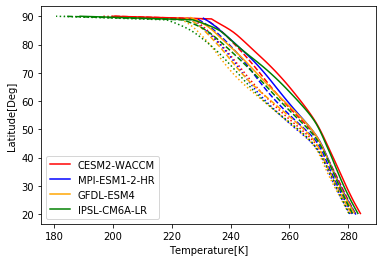

In [5]:
plt.plot(datadplot12015['mean'], datadplot12015.lat, color='red', linestyle='dotted')
plt.plot(datadplot12055['mean'], datadplot12055.lat, color='red', linestyle='dashed')
plt.plot(datadplot12085['mean'], datadplot12085.lat, label='CESM2-WACCM', color='red', linestyle='solid')

plt.plot(datadplot22015['mean'], datadplot22015.lat, color='blue', linestyle='dotted')
plt.plot(datadplot22055['mean'], datadplot22055.lat, color='blue', linestyle='dashed')
plt.plot(datadplot22085['mean'], datadplot22085.lat, label='MPI-ESM1-2-HR', color='blue', linestyle='solid')

plt.plot(datadplot32015['mean'], datadplot32015.lat, color='orange', linestyle='dotted')
plt.plot(datadplot32055['mean'], datadplot32055.lat, color='orange', linestyle='dashed')
plt.plot(datadplot32085['mean'], datadplot32085.lat, label='GFDL-ESM4', color='orange', linestyle='solid')

plt.plot(datadplot42015['mean'], datadplot42015.lat, color='green', linestyle='dotted')
plt.plot(datadplot42055['mean'], datadplot42055.lat, color='green', linestyle='dashed')
plt.plot(datadplot42085['mean'], datadplot42085.lat, label='IPSL-CM6A-LR', color='green', linestyle='solid')

plt.legend(loc='lower left')
plt.xlabel('Temperature[K]')
plt.ylabel('Latitude[Deg]')
plt.show()

In [22]:
##Boxcard version
# read data
# dragon plots of reanalysis
#dlist=[2015,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095]
dlist=[2015,2055,2085]
flist=['CESM2-WACCM','MPI-ESM1-2-HR','GFDL-ESM4','IPSL-CM6A-LR']
lp=1
for z in flist:
    print(z)
    for x in dlist:
        print(x)
        data=xr.load_dataset('/project2/moyer/jetsream/cmip6_processed_data/'+z+'_ssp585_tas_daily/'+z+'_ssp585_tas_daily_t_prime_' + str(x) + '-11-01_' + str(x+5) + '-03-01.nc4')
        datadf=data.sel(lon=np.unique(data.lon)[0]).to_dataframe().reset_index(drop=False)
        datadf['year']=datadf.time.dt.year
        datadf['month']=datadf.time.dt.month
        datadf=datadf.loc[(datadf['month'] == 1) | (datadf['month'] == 2) | (datadf['month'] == 12)]
        y=lp*10000+x
        globals()['datadfsub%s' % y]=datadf.loc[(datadf['lat'] >= 20)]
    lp=lp+1

CESM2-WACCM
2015
2055
2085
MPI-ESM1-2-HR
2015
2055
2085
GFDL-ESM4
2015
2055
2085
IPSL-CM6A-LR
2015
2055
2085


In [24]:
# this version with minimum and maximum 
mlist=[1,2,3,4]
for m in mlist:
    for x in dlist: 
        y=m*10000+x
        # dragon plots: grab CI for each latitude
        stats = globals()['datadfsub%s' % y].groupby(['lat'])['t_ref'].agg(['mean', 'min', 'max'])
        stats = stats.reset_index()
        globals()['datadplot%s' % y] = stats

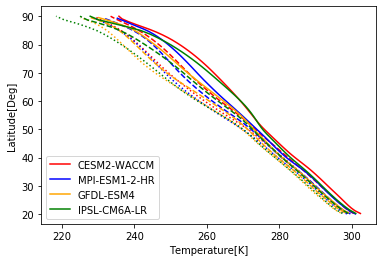

In [25]:
plt.plot(datadplot12015['mean'], datadplot12015.lat, color='red', linestyle='dotted')
plt.plot(datadplot12055['mean'], datadplot12055.lat, color='red', linestyle='dashed')
plt.plot(datadplot12085['mean'], datadplot12085.lat, label='CESM2-WACCM', color='red', linestyle='solid')

plt.plot(datadplot22015['mean'], datadplot22015.lat, color='blue', linestyle='dotted')
plt.plot(datadplot22055['mean'], datadplot22055.lat, color='blue', linestyle='dashed')
plt.plot(datadplot22085['mean'], datadplot22085.lat, label='MPI-ESM1-2-HR', color='blue', linestyle='solid')

plt.plot(datadplot32015['mean'], datadplot32015.lat, color='orange', linestyle='dotted')
plt.plot(datadplot32055['mean'], datadplot32055.lat, color='orange', linestyle='dashed')
plt.plot(datadplot32085['mean'], datadplot32085.lat, label='GFDL-ESM4', color='orange', linestyle='solid')

plt.plot(datadplot42015['mean'], datadplot42015.lat, color='green', linestyle='dotted')
plt.plot(datadplot42055['mean'], datadplot42055.lat, color='green', linestyle='dashed')
plt.plot(datadplot42085['mean'], datadplot42085.lat, label='IPSL-CM6A-LR', color='green', linestyle='solid')

plt.legend(loc='lower left')
plt.xlabel('Temperature[K]')
plt.ylabel('Latitude[Deg]')
plt.show()

## Chicago Local Banquet Plot

In [5]:
# closest value definition
lonsel=360-87.5
latsel=42

data=xr.load_dataset('/project2/geos39650/jet_stream/data/CESM2-WACCM_ssp585_tas_daily/CESM2-WACCM_ssp585_tas_daily_output_2015-12-01_2020-03-01.nc4')
absolute_difference_function = lambda list_value : abs(list_value - given_value)

given_value=latsel
lat_closest_value = min(data.to_dataframe().reset_index().lat.unique(), key=absolute_difference_function)
print(lat_closest_value)

given_value=lonsel
lon_closest_value = min(data.to_dataframe().reset_index().lon.unique(), key=absolute_difference_function)
print(lon_closest_value)

41.93717277486911
272.5


In [52]:
# select Chicago and compute standard deviation and skewness by 5-year, appending them all together
dlist=[2015,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095]
#dlist=[2015]
sdlist=[]
sklist=[]
sddf=pd.DataFrame(columns = ['winter','t_ref','t_prime','tas','lat','lon','year','month'])
skdf=pd.DataFrame(columns = ['winter','t_ref','t_prime','tas','lat','lon','year','month'])
for x in dlist:
    data=xr.load_dataset('/project2/geos39650/jet_stream/data/CESM2-WACCM_ssp585_tas_daily/CESM2-WACCM_ssp585_tas_daily_output_' + str(x) + '-12-01_' + str(x+5) + '-03-01.nc4')
    select=data.sel(lon=lon_closest_value)
    select=select.sel(lat=lat_closest_value)
    select=select.to_dataframe().reset_index()
    select['year']=select.time.dt.year
    select['month']=select.time.dt.month
    select=select.loc[(select['month'] == 1) | (select['month'] == 2) | (select['month'] == 12)]
    sd=select['t_prime'].std()
    skew=select['t_prime'].skew()
    sdlist.append(sd)
    sklist.append(skew)
    # assign by winter
    select['winter']=select['year']
    mask=select.month<=3
    select.loc[mask, 'winter'] = select['year']-1
    sdyear=select.groupby(['winter']).std().reset_index(drop=False)
    skyear=select.groupby(['winter']).skew().reset_index(drop=False)
    sddf=sddf.append(sdyear)
    skdf=skdf.append(skyear)
    

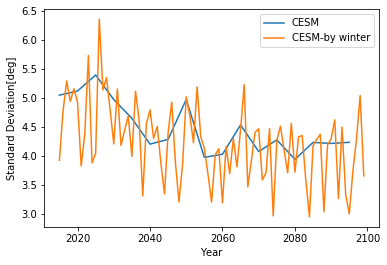

In [55]:
plt.plot(dlist, sdlist, label="CESM")
plt.plot(sddf.winter, sddf.t_prime, label="CESM-by winter")
plt.legend(loc='upper right')
plt.ylabel('Standard Deviation[deg]')
plt.xlabel('Year')

plt.show()

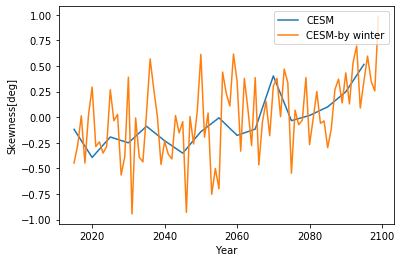

In [56]:
plt.plot(dlist, sklist, label="CESM")
plt.plot(skdf.winter, skdf.t_prime, label="CESM-by winter")
plt.legend(loc='upper right')
plt.ylabel('Skewness[deg]')
plt.xlabel('Year')

plt.show()

In [21]:
np.unique(datadfsub2020['lat'])[7]

-83.40314136125654

In [22]:
datadfsub2020.loc[datadfsub2020['lat'] == np.unique(datadfsub2020['lat'])[7]]

,lat,time,t_ref,t_prime,tas,lon,year
10857,-83.403141,2020-12-01,305.932349,-63.564383,242.367966,0.0,2020
10858,-83.403141,2020-12-02,306.409880,-63.185911,243.223969,0.0,2020
10859,-83.403141,2020-12-03,306.508712,-62.631591,243.877121,0.0,2020
10860,-83.403141,2020-12-04,305.347810,-58.796495,246.551315,0.0,2020
10861,-83.403141,2020-12-05,304.405740,-58.114846,246.290894,0.0,2020
...,...,...,...,...,...,...,...
12403,-83.403141,2025-02-25,306.519847,-70.785274,235.734573,0.0,2025
12404,-83.403141,2025-02-26,306.809390,-73.479358,233.330032,0.0,2025
12405,-83.403141,2025-02-27,306.654742,-63.708972,242.945770,0.0,2025
12406,-83.403141,2025-02-28,306.823326,-59.446633,247.376694,0.0,2025


In [6]:
# Compile and loop around different models
flist=['CESM2-WACCM','MPI-ESM1-2-HR','GFDL-ESM4','IPSL-CM6A-LR']
#flist=['CESM2-WACCM']
lp=1
for z in flist:
    print(z)
    
    print('closest value')
    # closest value definition
    lonsel=360-87.5
    latsel=42

    data=xr.load_dataset('/project2/moyer/jetsream/cimp6_processed_data_legacy/'+z+'_ssp585_tas_daily/'+z+'_ssp585_tas_daily_output_2015-12-01_2020-03-01.nc4')
    absolute_difference_function = lambda list_value : abs(list_value - given_value)

    given_value=latsel
    lat_closest_value = min(data.to_dataframe().reset_index().lat.unique(), key=absolute_difference_function)
    print(lat_closest_value)

    given_value=lonsel
    lon_closest_value = min(data.to_dataframe().reset_index().lon.unique(), key=absolute_difference_function)
    print(lon_closest_value)
    
    # select Chicago and compute standard deviation and skewness by 5-year, appending them all together
    dlist=[2015,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095]
    #dlist=[2015]
    sdlist=[]
    sklist=[]
    sddf=pd.DataFrame(columns = ['winter','t_ref','t_prime','tas','lat','lon','year','month'])
    skdf=pd.DataFrame(columns = ['winter','t_ref','t_prime','tas','lat','lon','year','month'])
    for x in dlist:
        print(x)
        data=xr.load_dataset('/project2/moyer/jetsream/cimp6_processed_data_legacy/'+z+'_ssp585_tas_daily/'+z+'_ssp585_tas_daily_output_' + str(x) + '-12-01_' + str(x+5) + '-03-01.nc4')
        select=data.sel(lon=lon_closest_value)
        select=select.sel(lat=lat_closest_value)
        select=select.to_dataframe().reset_index()
        select['year']=select.time.dt.year
        select['month']=select.time.dt.month
        select=select.loc[(select['month'] == 1) | (select['month'] == 2) | (select['month'] == 12)]
        sd=select['t_prime'].std()
        skew=select['t_prime'].skew()
        sdlist.append(sd)
        sklist.append(skew)
        # assign by winter
        select['winter']=select['year']
        mask=select.month<=3
        select.loc[mask, 'winter'] = select['year']-1
        sdyear=select.groupby(['winter']).std().reset_index(drop=False)
        skyear=select.groupby(['winter']).skew().reset_index(drop=False)
        sddf=sddf.append(sdyear)
        skdf=skdf.append(skyear)
          
    # output as individual datasets
    globals()['sdlist%s' % lp] = sdlist
    globals()['sklist%s' % lp] = sklist
    globals()['sddf%s' % lp] = sddf
    globals()['skdf%s' % lp] = skdf
    lp=lp+1
        

CESM2-WACCM
closest value
41.93717277486911
272.5
2015
2020
2025
2030
2035
2040
2045
2050
2055
2060
2065
2070
2075
2080
2085
2090
2095
MPI-ESM1-2-HR
closest value
41.61021795745573
272.8125
2015
2020
2025
2030
2035
2040
2045
2050
2055
2060
2065
2070
2075
2080
2085
2090
2095
GFDL-ESM4
closest value
41.5
271.875
2015
2020
2025
2030
2035
2040
2045
2050
2055
2060
2065
2070
2075
2080
2085
2090
2095
IPSL-CM6A-LR
closest value
41.83098602294922
272.5
2015
2020
2025
2030
2035
2040
2045
2050
2055
2060
2065
2070
2075
2080
2085
2090
2095


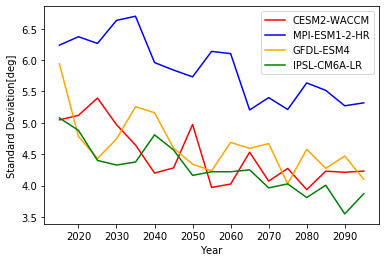

In [7]:
flist=['CESM2-WACCM','MPI-ESM1-2-HR','GFDL-ESM4','IPSL-CM6A-LR']
plt.plot(dlist, sdlist1, label="CESM2-WACCM", color="red")
plt.plot(dlist, sdlist2, label="MPI-ESM1-2-HR", color="blue")
plt.plot(dlist, sdlist3, label="GFDL-ESM4", color="orange")
plt.plot(dlist, sdlist4, label="IPSL-CM6A-LR", color="green")
plt.legend(loc='upper right')
plt.ylabel('Standard Deviation[deg]')
plt.xlabel('Year')

plt.show()

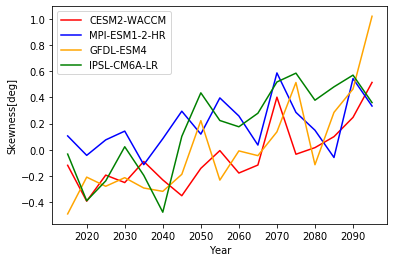

In [11]:
flist=['CESM2-WACCM','MPI-ESM1-2-HR','GFDL-ESM4','IPSL-CM6A-LR']
plt.plot(dlist, sklist1, label="CESM2-WACCM", color="red")
plt.plot(dlist, sklist2, label="MPI-ESM1-2-HR", color="blue")
plt.plot(dlist, sklist3, label="GFDL-ESM4", color="orange")
plt.plot(dlist, sklist4, label="IPSL-CM6A-LR", color="green")
plt.legend(loc='upper left')
plt.ylabel('Skewness[deg]')
plt.xlabel('Year')

plt.show()

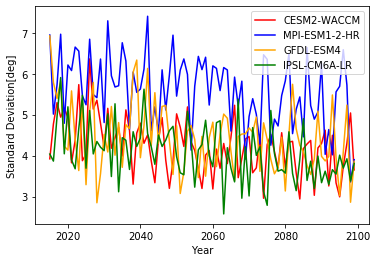

In [9]:
flist=['CESM2-WACCM','MPI-ESM1-2-HR','GFDL-ESM4','IPSL-CM6A-LR']
plt.plot(sddf1.winter, sddf1.t_prime, label="CESM2-WACCM", color="red")
plt.plot(sddf2.winter, sddf2.t_prime, label="MPI-ESM1-2-HR", color="blue")
plt.plot(sddf3.winter, sddf3.t_prime, label="GFDL-ESM4", color="orange")
plt.plot(sddf4.winter, sddf4.t_prime, label="IPSL-CM6A-LR", color="green")
plt.legend(loc='upper right')
plt.ylabel('Standard Deviation[deg]')
plt.xlabel('Year')

plt.show()

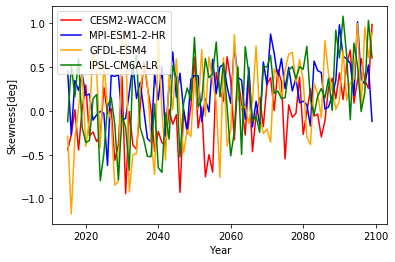

In [12]:
flist=['CESM2-WACCM','MPI-ESM1-2-HR','GFDL-ESM4','IPSL-CM6A-LR']
plt.plot(skdf1.winter, skdf1.t_prime, label="CESM2-WACCM", color="red")
plt.plot(skdf2.winter, skdf2.t_prime, label="MPI-ESM1-2-HR", color="blue")
plt.plot(skdf3.winter, skdf3.t_prime, label="GFDL-ESM4", color="orange")
plt.plot(skdf4.winter, skdf4.t_prime, label="IPSL-CM6A-LR", color="green")
plt.legend(loc='upper left')
plt.ylabel('Skewness[deg]')
plt.xlabel('Year')

plt.show()

In [44]:
##Ivan's boxcard mission
# Compile and loop around different models
flist=['CESM2-WACCM','MPI-ESM1-2-HR','GFDL-ESM4','IPSL-CM6A-LR']
#flist=['CESM2-WACCM']
lp=1
for z in flist:
    print(z)
    
    print('closest value')
    # closest value definition
    lonsel=-87.5
    latsel=42

    data=xr.load_dataset('/project2/moyer/jetsream/cmip6_processed_data/'+z+'_ssp585_tas_daily/'+z+'_ssp585_tas_daily_t_prime_2015-11-01_2020-03-01.nc4')
    absolute_difference_function = lambda list_value : abs(list_value - given_value)

    given_value=latsel
    lat_closest_value = min(data.to_dataframe().reset_index().lat.unique(), key=absolute_difference_function)
    print(lat_closest_value)

    given_value=lonsel
    lon_closest_value = min(data.to_dataframe().reset_index().lon.unique(), key=absolute_difference_function)
    print(lon_closest_value)
    
    # select Chicago and compute standard deviation and skewness by 5-year, appending them all together
    dlist=[2015,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095]
    #dlist=[2015]
    sdlist=[]
    sklist=[]
    sddf=pd.DataFrame(columns = ['winter','t_ref','t_prime','tas','lat','lon','year','month'])
    skdf=pd.DataFrame(columns = ['winter','t_ref','t_prime','tas','lat','lon','year','month'])
    for x in dlist:
        print(x)
        data=xr.load_dataset('/project2/moyer/jetsream/cmip6_processed_data/'+z+'_ssp585_tas_daily/'+z+'_ssp585_tas_daily_t_prime_' + str(x) + '-11-01_' + str(x+5) + '-03-01.nc4')
        select=data.sel(lon=lon_closest_value)
        select=select.sel(lat=lat_closest_value)
        select=select.to_dataframe().reset_index()
        select['year']=select.time.dt.year
        select['month']=select.time.dt.month
        select=select.loc[(select['month'] == 1) | (select['month'] == 2) | (select['month'] == 12)]
        sd=select['t_prime'].std()
        skew=select['t_prime'].skew()
        sdlist.append(sd)
        sklist.append(skew)
        # assign by winter
        select['winter']=select['year']
        mask=select.month<=3
        select.loc[mask, 'winter'] = select['year']-1
        sdyear=select.groupby(['winter']).std().reset_index(drop=False)
        skyear=select.groupby(['winter']).skew().reset_index(drop=False)
        sddf=sddf.append(sdyear, sort=True)
        skdf=skdf.append(skyear, sort=True)
          
    # output as individual datasets
    globals()['sdlist%s' % lp] = sdlist
    globals()['sklist%s' % lp] = sklist
    globals()['sddf%s' % lp] = sddf
    globals()['skdf%s' % lp] = skdf
    lp=lp+1
    

CESM2-WACCM
closest value
41.93717277486911
-87.5
2015
2020
2025
2030
2035
2040
2045
2050
2055
2060
2065
2070
2075
2080
2085
2090
2095
MPI-ESM1-2-HR
closest value
41.61021795745573
-87.1875
2015
2020
2025
2030
2035
2040
2045
2050
2055
2060
2065
2070
2075
2080
2085
2090
2095
GFDL-ESM4
closest value
41.5
-88.125
2015
2020
2025
2030
2035
2040
2045
2050
2055
2060
2065
2070
2075
2080
2085
2090
2095
IPSL-CM6A-LR
closest value
41.83098602294922
-87.5
2015
2020
2025
2030
2035
2040
2045
2050
2055
2060
2065
2070
2075
2080
2085
2090
2095


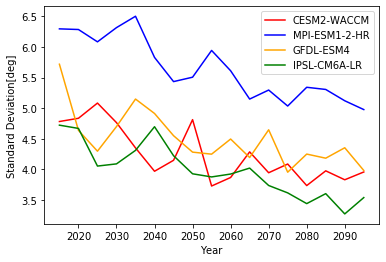

In [45]:
flist=['CESM2-WACCM','MPI-ESM1-2-HR','GFDL-ESM4','IPSL-CM6A-LR']
plt.plot(dlist, sdlist1, label="CESM2-WACCM", color="red")
plt.plot(dlist, sdlist2, label="MPI-ESM1-2-HR", color="blue")
plt.plot(dlist, sdlist3, label="GFDL-ESM4", color="orange")
plt.plot(dlist, sdlist4, label="IPSL-CM6A-LR", color="green")
plt.legend(loc='upper right')
plt.ylabel('Standard Deviation[deg]')
plt.xlabel('Year')

plt.show()

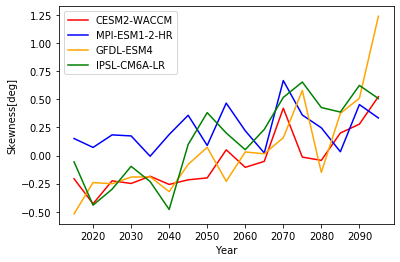

In [46]:
flist=['CESM2-WACCM','MPI-ESM1-2-HR','GFDL-ESM4','IPSL-CM6A-LR']
plt.plot(dlist, sklist1, label="CESM2-WACCM", color="red")
plt.plot(dlist, sklist2, label="MPI-ESM1-2-HR", color="blue")
plt.plot(dlist, sklist3, label="GFDL-ESM4", color="orange")
plt.plot(dlist, sklist4, label="IPSL-CM6A-LR", color="green")
plt.legend(loc='upper left')
plt.ylabel('Skewness[deg]')
plt.xlabel('Year')

plt.show()

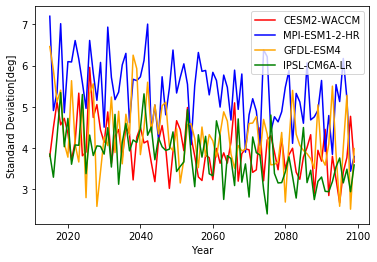

In [47]:
flist=['CESM2-WACCM','MPI-ESM1-2-HR','GFDL-ESM4','IPSL-CM6A-LR']
plt.plot(sddf1.winter, sddf1.t_prime, label="CESM2-WACCM", color="red")
plt.plot(sddf2.winter, sddf2.t_prime, label="MPI-ESM1-2-HR", color="blue")
plt.plot(sddf3.winter, sddf3.t_prime, label="GFDL-ESM4", color="orange")
plt.plot(sddf4.winter, sddf4.t_prime, label="IPSL-CM6A-LR", color="green")
plt.legend(loc='upper right')
plt.ylabel('Standard Deviation[deg]')
plt.xlabel('Year')

plt.show()

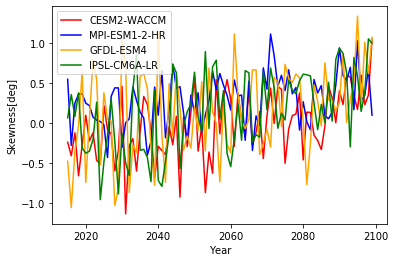

In [48]:
flist=['CESM2-WACCM','MPI-ESM1-2-HR','GFDL-ESM4','IPSL-CM6A-LR']
plt.plot(skdf1.winter, skdf1.t_prime, label="CESM2-WACCM", color="red")
plt.plot(skdf2.winter, skdf2.t_prime, label="MPI-ESM1-2-HR", color="blue")
plt.plot(skdf3.winter, skdf3.t_prime, label="GFDL-ESM4", color="orange")
plt.plot(skdf4.winter, skdf4.t_prime, label="IPSL-CM6A-LR", color="green")
plt.legend(loc='upper left')
plt.ylabel('Skewness[deg]')
plt.xlabel('Year')

plt.show()

## Skewness map for Eff Lat

In [2]:
# for models
efflat = xr.load_dataset('/project2/geos39650/jet_stream/data/model_output/eff_lat/eff_lat_demean_sum_2015_2050.nc4')

In [3]:
# select out by time into 2015-2030,2030-2050
def decade_separator(year,month,ymin,ymax):
    return ((year < ymax) & (year > ymin)) | ((year == ymax) & (month <= 3)) | ((year == ymin) & (month >=12))
half1 = efflat.sel(time=decade_separator(efflat['time.year'],efflat['time.month'],2015,2030))
half2 = efflat.sel(time=decade_separator(efflat['time.year'],efflat['time.month'],2030,2050))

In [4]:
data1=half1.to_dataframe().reset_index(drop=False)
data2=half2.to_dataframe().reset_index(drop=False)

In [5]:
skew1=data1.groupby(['latitude','longitude']).skew().reset_index(drop=False)
skew2=data2.groupby(['latitude','longitude']).skew().reset_index(drop=False)

In [7]:
skew1=skew1.drop('dayofyear', axis=1)
skew2=skew2.drop('dayofyear', axis=1)

In [9]:
skew1.columns=['latitude','longitude','skewness1']
skew2.columns=['latitude','longitude','skewness2']

In [13]:
skewdat=pd.merge(skew1,skew2,on=['latitude','longitude'])
skewdat['skewdiff']=skewdat.skewness2-skewdat.skewness1

In [14]:
skewdat

,latitude,longitude,skewness1,skewness2,skewdiff
0,20.26178,0.00,-0.046101,0.009588,0.055689
1,20.26178,1.25,-0.210836,-0.107737,0.103099
2,20.26178,2.50,-0.336313,-0.246110,0.090203
3,20.26178,3.75,-0.373256,-0.411322,-0.038066
4,20.26178,5.00,-0.381780,-0.459227,-0.077447
...,...,...,...,...,...
21595,90.00000,353.75,-0.233921,-0.121162,0.112759
21596,90.00000,355.00,-0.232639,-0.121364,0.111275
21597,90.00000,356.25,-0.232022,-0.121912,0.110109
21598,90.00000,357.50,-0.232272,-0.122829,0.109443


In [15]:
# save a copy
skewdat.to_csv('/project2/geos39650/jet_stream/data/model_output/eff_lat/skewnessoutput.csv',index=True)

In [6]:
skew1_index = skew1.set_index(['latitude', 'longitude'])
skew1_index.rename(columns={'__xarray_dataarray_variable__': 'skewness'}, inplace=True)
skew1_index.rename(columns={'latitude': 'lat'}, inplace=True)
skew1_index.rename(columns={'longitude': 'lon'}, inplace=True)
skew1_array = skew1_index.to_xarray()
skew2_index = skew2.set_index(['latitude', 'longitude'])
skew2_index.rename(columns={'__xarray_dataarray_variable__': 'skewness'}, inplace=True)
skew2_index.rename(columns={'latitude': 'lat'}, inplace=True)
skew2_index.rename(columns={'longitude': 'lon'}, inplace=True)
skew2_array = skew2_index.to_xarray()

In [35]:
# blob plot!
def globe_plots(xarr,titlestr="",contour=False,contours=None):
    #set up the axes for a globe
    plt.subplots(figsize = (10, 10))
    ax = plt.axes(projection=ccrs.Orthographic(20, 90))
    #coolcool now we can plot it
    
    if contour:
        if contours is None:
            contours=range(int(xarr.min()),int(xarr.max()),10)
        xarr.plot.contourf(ax=ax,
                           transform=ccrs.PlateCarree(),
                           levels=contours,
                           cbar_kwargs={'orientation': 'horizontal',
                                    'pad': 0.05,
                                    'shrink': 0.5,
#                                     'spacing': 'proportional',
                                    'ticks':contours}
                                       )
    else:
        xarr.plot(ax=ax, transform=ccrs.PlateCarree())
        
    ax.set_title(titlestr)
    #make it draw the pretty continents
    ax.set_global(); ax.coastlines();
    #draw lat-lon isocontours
    ax.gridlines()
    ax.plot()
    plt.show()

In [63]:
skew1_array

<xarray.Dataset>
Dimensions:    (dayofyear: 1, latitude: 75, longitude: 288)
Coordinates:
  * latitude   (latitude) float64 20.26 21.2 22.15 23.09 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * dayofyear  (dayofyear) float64 0.6336
Data variables:
    skewness   (latitude, longitude, dayofyear) float64 -0.0461 ... -0.2364

In [ ]:
# blob plot!
plt.subplots(figsize = (10, 10))
ax = plt.axes(projection=ccrs.Orthographic(20, 90))
contours=range(int(min(skew1.__xarray_dataarray_variable__)),int(max(skew1.__xarray_dataarray_variable__)),1)
skew1_array.skewness.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=None,
                   cbar_kwargs={'orientation': 'horizontal',
                   'pad': 0.05,
                   'shrink': 0.5,
                   'ticks':None}
                                       )                   
#ax.set_title(titlestr)
#make it draw the pretty continents
ax.set_global(); ax.coastlines();
#draw lat-lon isocontours
ax.gridlines()
ax.plot()
plt.show()

## Take standard deviation for Ivan's Eff Lat

In [4]:
# for models
efflat = pd.read_csv('/project2/geos39650/jet_stream/data/model_output/eff_lat/eff_lat_gcm_chicago.csv')

In [5]:
# generate year and month
efflat['timestamp']=pd.to_datetime(efflat.time, infer_datetime_format=True)
efflat['year']=efflat.timestamp.dt.year
efflat['month']=efflat.timestamp.dt.month
efflat

,member_id,nbnd,time,time_bnds,lon_bnds,lat_bnds,latitude,longitude,t2m,temp_bracket,area_grid,cdf_eff_lat_mapping,eff_lat_deg,timestamp,year,month
0,r1i1p1f1,0,2015-01-01,2015-01-01 00:00:00,271.875,41.46597,41.937173,272.5,272.21286,270.987,6.819712e+07,0.821690,47.079353,2015-01-01,2015,1
1,r1i1p1f1,0,2015-01-02,2015-01-01 00:00:00,271.875,41.46597,41.937173,272.5,272.31424,270.987,6.799691e+07,0.822845,47.145518,2015-01-02,2015,1
2,r1i1p1f1,0,2015-01-03,2015-01-02 00:00:00,271.875,41.46597,41.937173,272.5,273.29437,272.987,7.478910e+07,0.784429,44.944479,2015-01-03,2015,1
3,r1i1p1f1,0,2015-01-04,2015-01-03 00:00:00,271.875,41.46597,41.937173,272.5,274.94302,272.987,7.336212e+07,0.792375,45.399731,2015-01-04,2015,1
4,r1i1p1f1,0,2015-01-05,2015-01-04 00:00:00,271.875,41.46597,41.937173,272.5,273.67545,272.987,7.240606e+07,0.797734,45.706805,2015-01-05,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15477,r1i1p1f1,1,2100-12-28,2100-12-28 00:00:00,273.125,42.40838,41.937173,272.5,275.82470,274.987,5.815843e+07,0.881516,50.507121,2100-12-28,2100,12
15478,r1i1p1f1,1,2100-12-29,2100-12-29 00:00:00,273.125,42.40838,41.937173,272.5,274.66306,272.987,5.120496e+07,0.925629,53.034615,2100-12-29,2100,12
15479,r1i1p1f1,1,2100-12-30,2100-12-30 00:00:00,273.125,42.40838,41.937173,272.5,275.07675,274.987,5.970174e+07,0.872044,49.964452,2100-12-30,2100,12
15480,r1i1p1f1,1,2100-12-31,2100-12-31 00:00:00,273.125,42.40838,41.937173,272.5,277.73495,276.987,6.675339e+07,0.830050,47.558333,2100-12-31,2100,12


In [6]:
# separated into decades
dlist=[2010,2020,2030,2040,2050,2060,2070,2080,2090]
for x in dlist:
    globals()['demT%s' % x] = efflat.loc[((efflat.year < x+10) & (efflat.year > x)) | ((efflat.year == x+10) & (efflat.month <= 3)) | ((efflat.year == x) & (efflat.month >=12))]
    

In [7]:
# Compute standard deviations
wlist=[]
for x in dlist:
    #ent = np.std(globals()['demT%s' % x]['eff_lat_deg'])
    # IQR
    Q1 = np.percentile(globals()['demT%s' % x]['eff_lat_deg'], 25, interpolation = 'midpoint') 
    Q3 = np.percentile(globals()['demT%s' % x]['eff_lat_deg'], 75, interpolation = 'midpoint') 
    ent = Q3 - Q1 
    wlist.append(ent)

In [8]:
wlist

[5.701756226455323,
 6.149637481606611,
 5.671243366045019,
 5.597995467446417,
 5.571679530285039,
 5.965048046561883,
 5.848296104903284,
 6.304649865844773,
 6.112983693546035]

No handles with labels found to put in legend.


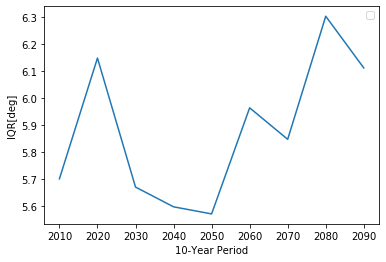

In [29]:
# Plotting time series
plt.plot(dlist, wlist)
plt.legend(loc='upper right')
plt.ylabel('IQR[deg]')
plt.xlabel('10-Year Period')

plt.show()

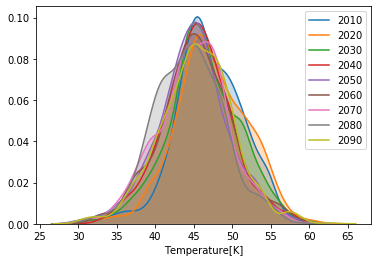

In [32]:
# replicate histograms
for x in dlist:
    sns.kdeplot(globals()['demT%s' % x].eff_lat_deg, shade=True, label=x)
plt.legend(loc='upper right')
plt.xlabel('Temperature[K]')
plt.show()

## Take variance measure for Ivan's outputs

### Liz's Slope-Variance Comparison

In [2]:
# dragon plots of reanalysis
dlist=[1980,1985,1990,1995,2000,2005,2010,2015]
#dlist=[1980]
for x in dlist:
    data=xr.load_dataset('/project2/geos39650/jet_stream/data/model_output/tref/t_ref_reanalysis_' + str(x) + '-12-01_' + str(x+5) + '-03-01.nc4')
    datadf=data.sel(longitude=0).to_dataframe().reset_index(drop=False)
    datadf['year']=datadf.time.dt.year
    globals()['datadfsub%s' % x]=datadf

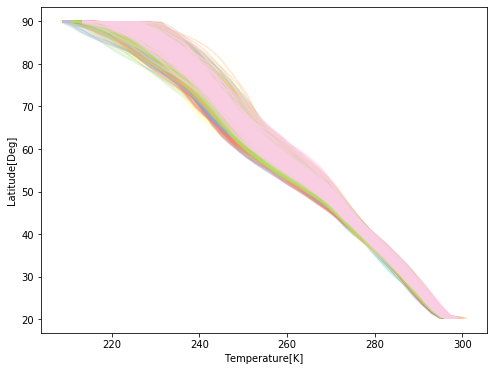

In [7]:
# misty plots
ll=len(dlist)
i=0
fig, ax = plt.subplots(figsize=(8,6))
for yr in dlist:
    for label, df in globals()['datadfsub%s' % yr].groupby("time"):
        plt.plot(df["__xarray_dataarray_variable__"],df["latitude"],color=colormap(range(ll))[i],alpha=0.3)
    i=i+1
    
plt.ylabel('Latitude[Deg]')
plt.xlabel('Temperature[K]')
plt.show()

In [7]:
# dragon plots: append into decades
datadragon1980=pd.DataFrame.append(datadfsub1980,datadfsub1985)
datadragon1990=pd.DataFrame.append(datadfsub1990,datadfsub1995)
datadragon2000=pd.DataFrame.append(datadfsub2000,datadfsub2005)
datadragon2010=pd.DataFrame.append(datadfsub2010,datadfsub2015)

In [31]:
import math

ddlist=[1980,1990,2000,2010]

for x in ddlist: 
    # dragon plots: grab 95 CI for each latitude
    stats = globals()['datadragon%s' % x].groupby(['latitude'])['__xarray_dataarray_variable__'].agg(['mean', 'count', 'std'])
    ci95_hi = []
    ci95_lo = []

    for i in stats.index:
        m, c, s = stats.loc[i]
        ci95_hi.append(m + 1.96*s)
        ci95_lo.append(m - 1.96*s)

    stats['ci95_hi'] = ci95_hi
    stats['ci95_lo'] = ci95_lo
    stats = stats.reset_index()
    globals()['datadplot%s' % x] = stats



In [33]:
ddlist=[1980,1990,2000,2010]
# this version with minimum and maximum 
for x in ddlist: 
    # dragon plots: grab 95 CI for each latitude
    stats = globals()['datadragon%s' % x].groupby(['latitude'])['__xarray_dataarray_variable__'].agg(['mean', 'min', 'max'])
    stats = stats.reset_index()
    globals()['datadplot%s' % x] = stats

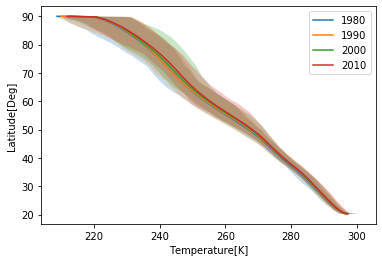

In [49]:
# dragon plot: plot
for x in ddlist:
    plt.plot(globals()['datadplot%s' % x]['mean'], globals()['datadplot%s' % x].latitude, label=x)
    plt.fill_betweenx(globals()['datadplot%s' % x].latitude, globals()['datadplot%s' % x]['min'], globals()['datadplot%s' % x]['max'], alpha=0.25)
    
plt.legend(loc='upper right')
plt.xlabel('Temperature[K]')
plt.ylabel('Latitude[Deg]')
plt.show()

In [82]:
datadfsub2005[datadfsub2005['time']=='2005-12-01'].__xarray_dataarray_variable__

0         241.135
451       241.135
902       241.135
1353      241.135
1804      241.135
           ...   
124025    291.135
124476    291.135
124927    291.135
125378    291.135
125829    291.135
Name: __xarray_dataarray_variable__, Length: 280, dtype: float64

In [12]:
dlist=[1980,1990,2000,2010]
#dlist=[1980]
zlist=[]
for x in dlist:
    data1=xr.load_dataset('/project2/geos39650/jet_stream/data/model_output/tref/t_ref_reanalysis_' + str(x) + '-12-01_' + str(x+5) + '-03-01.nc4')
    data2=xr.load_dataset('/project2/geos39650/jet_stream/data/model_output/tref/t_ref_reanalysis_' + str(x+5) + '-12-01_' + str(x+10) + '-03-01.nc4')
    select11=data1.sel(longitude=272.5)
    select11=select11.sel(latitude=42)
    select21=data1.sel(longitude=272.5)
    select21=select21.sel(latitude=41.75)
    select12=data2.sel(longitude=272.5)
    select12=select12.sel(latitude=42)
    select22=data2.sel(longitude=272.5)
    select22=select22.sel(latitude=41.75)
    select1=pd.DataFrame.append(select11.to_dataframe(),select12.to_dataframe())
    select2=pd.DataFrame.append(select21.to_dataframe(),select22.to_dataframe())
    ent = np.mean(select1['__xarray_dataarray_variable__']-select2['__xarray_dataarray_variable__'])/0.25
    zlist.append(ent)

In [13]:
zlist

[-0.9441830209237364,
 -0.9568965976395458,
 -0.9438549833428272,
 -0.9188816324330552]

In [33]:
#80-20 tag
dlist=[1980,1990,2000,2010]
#dlist=[1980]
zlist=[]
for x in dlist:
    data1=xr.load_dataset('/project2/geos39650/jet_stream/data/model_output/tref/t_ref_reanalysis_' + str(x) + '-12-01_' + str(x+5) + '-03-01.nc4')
    data2=xr.load_dataset('/project2/geos39650/jet_stream/data/model_output/tref/t_ref_reanalysis_' + str(x+5) + '-12-01_' + str(x+10) + '-03-01.nc4')
    select11=data1.sel(longitude=272.5)
    select11=select11.sel(latitude=80)
    select21=data1.sel(longitude=272.5)
    select21=select21.sel(latitude=25)
    select12=data2.sel(longitude=272.5)
    select12=select12.sel(latitude=80)
    select22=data2.sel(longitude=272.5)
    select22=select22.sel(latitude=25)
    select1=pd.DataFrame.append(select11.to_dataframe(),select12.to_dataframe())
    select2=pd.DataFrame.append(select21.to_dataframe(),select22.to_dataframe())
    ent = np.mean(select1['__xarray_dataarray_variable__']-select2['__xarray_dataarray_variable__'])/(80-25)
    zlist.append(ent)
zlist

[-1.0108031358490728,
 -1.0104042423070176,
 -1.0074617742656071,
 -0.9961707194089087]

In [86]:
# demeaned Tprime reading
data_demT=xr.load_dataset('/project2/geos39650/jet_stream/data/model_output/demean/demean_t_prime_1980_2020.nc4')

In [87]:
# select given lat/lon
select_demT = data_demT.sel(longitude=272.5)
select_demT = select_demT.sel(latitude=42)
select_demT

<xarray.Dataset>
Dimensions:                        (time: 3429)
Coordinates:
    longitude                      float32 272.5
    latitude                       float32 42.0
  * time                           (time) datetime64[ns] 1980-12-01 ... 2018-02-28
    dayofyear                      (time) int64 336 337 338 339 ... 56 57 58 59
Data variables:
    __xarray_dataarray_variable__  (time) float64 3.335 1.697 ... 5.645 8.433

In [6]:
# sepearate into 10-yearly like Ivan's format, Dec-March 
def decade_separator(year,month,ymin,ymax):
    return ((year < ymax) & (year > ymin)) | ((year == ymax) & (month <= 3)) | ((year == ymin) & (month >=12))

In [7]:
dlist=[1980,1990,2000,2010]
for x in dlist:
    globals()['demT%s' % x] = select_demT.sel(time=decade_separator(select_demT['time.year'],select_demT['time.month'],x,x+10))

In [9]:
# take variance for each dataset and compile into dataframe
wlist=[]
for x in dlist:
    ent = np.var(globals()['demT%s' % x].to_dataframe()['__xarray_dataarray_variable__'])
    wlist.append(ent)

In [10]:
wlist

[28.242194479116385, 22.72923064667696, 22.800620045220004, 26.348935298235105]

In [88]:
np.std(select_demT.to_dataframe()['__xarray_dataarray_variable__'])

5.010011711439708

In [10]:
wlist[3]/wlist[0]

0.7476778243151027

In [14]:
zlist[3]/zlist[0]

0.9732028770588061

In [15]:
sdlist=[]
slplist=[]
for x in range(3):
    ent1 = wlist[x+1]/wlist[x]
    sdlist.append(ent1)
    ent2 = zlist[x+1]/zlist[x]
    slplist.append(ent2)

In [19]:
sdlist

[0.8047969028569656, 1.0031408629554068, 1.1556236297950582]

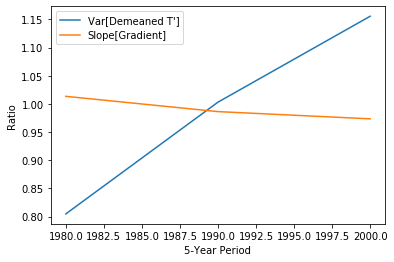

In [18]:
dlist2=[1980,1990,2000]
# Plotting time series
plt.plot(dlist2, sdlist, label="Var[Demeaned T']")
plt.plot(dlist2, slplist, label="Slope[Gradient]")

plt.legend(loc='upper left')
plt.ylabel('Ratio')
plt.xlabel('5-Year Period')

plt.show()

In [2]:
# testing plots
flist=[2015]
zlist=[]
for x in flist:
    data=xr.load_dataset('/project2/geos39650/jet_stream/data/t_ref_no_resample_cimp6_' + str(x) + '-12-01_' + str(x+10) + '-03-01.nc4')
    select1=data.sel(longitude=data.longitude[218])
    select1=select1.sel(latitude=data.latitude[23])
    select2=data.sel(longitude=data.longitude[218])
    select2=select2.sel(latitude=data.latitude[22])
    ent = np.mean(select1.to_dataframe()['__xarray_dataarray_variable__']-select2.to_dataframe()['__xarray_dataarray_variable__'])/np.asscalar(data.latitude[23]-data.latitude[22])
    zlist.append(ent)

/home/yuqisong/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning:

np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead



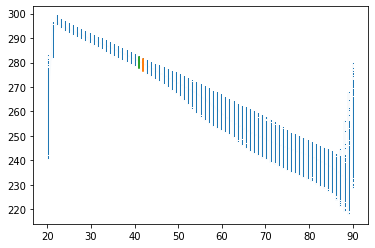

In [17]:
datadf=data.to_dataframe().reset_index(drop=False)
select1df=select1.to_dataframe().reset_index(drop=False)
select2df=select2.to_dataframe().reset_index(drop=False)
plt.plot(datadf.latitude,datadf.__xarray_dataarray_variable__,marker=',',alpha=0.03)
plt.plot(select1df.latitude,select1df.__xarray_dataarray_variable__)
plt.plot(select2df.latitude,select2df.__xarray_dataarray_variable__)

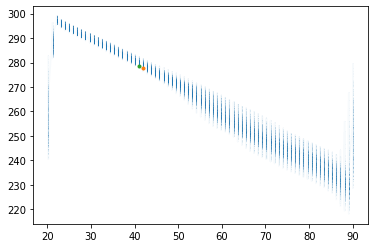

In [26]:
datadf['year']=datadf.time.dt.year
datadfsub=datadf[datadf.longitude==0]
#select1df['year']=select1df.time.dt.year
#select1dfsub=select1df[select1df.longitude==0]
#select2df['year']=select2df.time.dt.year
#datadfsub=datadf[datadf.longitude==0]
plt.plot(datadfsub.latitude,datadfsub.__xarray_dataarray_variable__,marker=',',alpha=0.03)
plt.plot(select1df[select1df['time']=='2015-12-24'].latitude,select1df[select1df['time']=='2015-12-24'].__xarray_dataarray_variable__,marker='.')
plt.plot(select2df[select1df['time']=='2015-12-24'].latitude,select2df[select1df['time']=='2015-12-24'].__xarray_dataarray_variable__,marker='.')

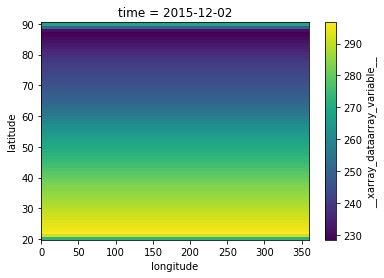

In [24]:
data.isel(time=1).__xarray_dataarray_variable__.plot()

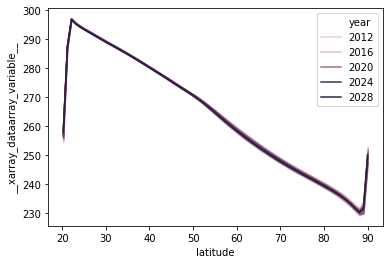

In [15]:
sns.lineplot(x="latitude",y="__xarray_dataarray_variable__",data=datadfsub,hue='year')

In [2]:
# dragon plots of projections
# flist=[2015]
flist=[2015,2025,2035,2045,2055,2065,2075,2085,2095]
for x in flist:
    data=xr.load_dataset('/project2/geos39650/jet_stream/data/model_output/tref/t_ref_gcm_' + str(x) + '-12-01_' + str(x+10) + '-03-01.nc4')
    datadf=data.to_dataframe().reset_index(drop=False)
    datadf['year']=datadf.time.dt.year
    globals()['datadfsub%s' % x]=datadf[datadf.longitude==0]

In [3]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 12)
reds = cm.get_cmap('Reds', 12)
colormap = cm.get_cmap('Set3', 12)
print(viridis)
print('viridis(range(12))', viridis(range(12)))
print(reds)
print('reds(range(12))', reds(range(12)))

viridis(range(12)) [[0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
reds(range(12)) [[1.         0.96078431 0.94117647 1.        ]
 [0.99714795 0.90089127 0.85561497 1.        ]
 [0.99251337 0.81247772 0.73618538 1.        ]
 [0.98823529 0.70409982 0.59786096 1.        ]
 [0.98823529 0.58716578 0.46381462 1.        ]
 [0.98573975 0.47272727 0.34723708 1.        ]
 [0.96720143 0.3486631  0.24741533 1.        ]
 [0.92442068 0.21889483 0.16720143 1.        ]
 [0.82174688 0.11907308 0.12442068 1.        ]
 [0.71479501 0.07486631 0.09661319 1.        ]
 [0.58074866 0.04278075 0.

NameError: name 'datadfsub' is not defined

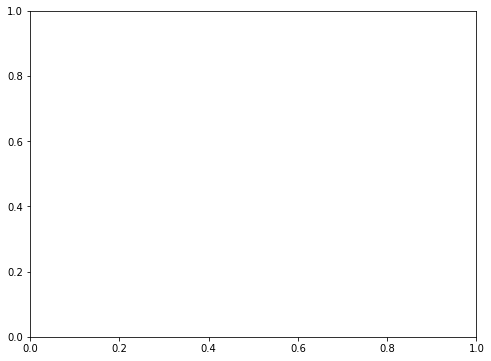

In [6]:
ll=len(datadfsub2015.year.unique())
i=0
fig, ax = plt.subplots(figsize=(8,6))
for yr in datadfsub2015.year.unique():
    for label, df in datadfsub2015[datadfsub['year']==yr].groupby("time"):
        plt.plot(df["latitude"], df["__xarray_dataarray_variable__"],label=yr,color=colormap(range(ll))[i],alpha=0.3)
    i=i+1
plt.show()

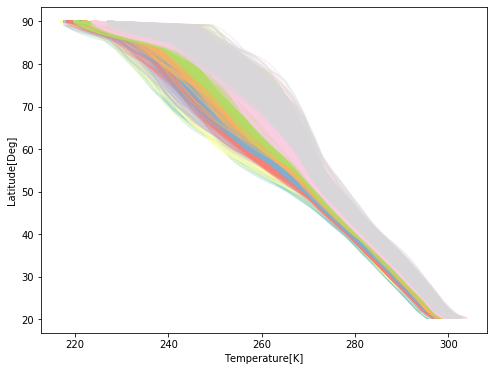

In [4]:
ll=len(flist)
i=0
fig, ax = plt.subplots(figsize=(8,6))
for yr in flist:
    for label, df in globals()['datadfsub%s' % yr].groupby("time"):
        plt.plot(df["__xarray_dataarray_variable__"],df["latitude"],color=colormap(range(ll))[i],alpha=0.3)
    i=i+1
    
plt.ylabel('Latitude[Deg]')
plt.xlabel('Temperature[K]')
plt.show()

In [4]:
# this version with minimum and maximum 
for x in flist: 
    # dragon plots: grab 95 CI for each latitude
    stats = globals()['datadfsub%s' % x].groupby(['latitude'])['__xarray_dataarray_variable__'].agg(['mean', 'min', 'max'])
    stats = stats.reset_index()
    globals()['datadplot%s' % x] = stats

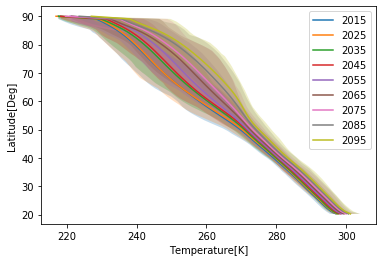

In [6]:
# dragon plot: plot
for x in flist:
    plt.plot(globals()['datadplot%s' % x]['mean'], globals()['datadplot%s' % x].latitude, label=x)
    plt.fill_betweenx(globals()['datadplot%s' % x].latitude, globals()['datadplot%s' % x]['min'], globals()['datadplot%s' % x]['max'], alpha=0.25)
    
plt.legend(loc='upper right')
plt.xlabel('Temperature[K]')
plt.ylabel('Latitude[Deg]')
plt.show()

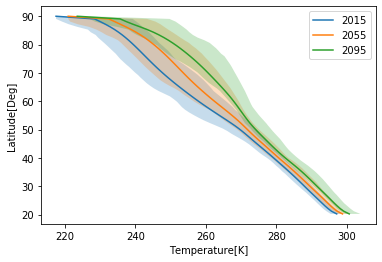

In [5]:
plt.plot(datadplot2015['mean'], datadplot2015.latitude, label=2015)
plt.fill_betweenx(datadplot2015.latitude, datadplot2015['min'], datadplot2015['max'], alpha=0.25)

plt.plot(datadplot2055['mean'], datadplot2055.latitude, label=2055)
plt.fill_betweenx(datadplot2055.latitude, datadplot2055['min'], datadplot2055['max'], alpha=0.25)

plt.plot(datadplot2085['mean'], datadplot2085.latitude, label=2095)
plt.fill_betweenx(datadplot2095.latitude, datadplot2095['min'], datadplot2095['max'], alpha=0.25)

plt.legend(loc='upper right')
plt.xlabel('Temperature[K]')
plt.ylabel('Latitude[Deg]')
plt.show()

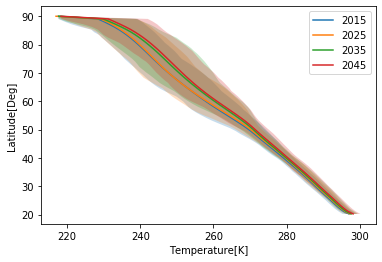

In [7]:
# dragon plot: plot
fflist=[2015,2025,2035,2045]
for x in fflist:
    plt.plot(globals()['datadplot%s' % x]['mean'], globals()['datadplot%s' % x].latitude, label=x)
    plt.fill_betweenx(globals()['datadplot%s' % x].latitude, globals()['datadplot%s' % x]['min'], globals()['datadplot%s' % x]['max'], alpha=0.25)
    
plt.legend(loc='upper right')
plt.xlabel('Temperature[K]')
plt.ylabel('Latitude[Deg]')
plt.show()

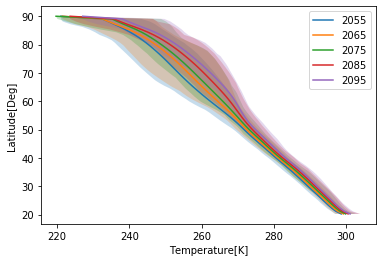

In [8]:
# dragon plot: plot
fflist=[2055,2065,2075,2085,2095]
for x in fflist:
    plt.plot(globals()['datadplot%s' % x]['mean'], globals()['datadplot%s' % x].latitude, label=x)
    plt.fill_betweenx(globals()['datadplot%s' % x].latitude, globals()['datadplot%s' % x]['min'], globals()['datadplot%s' % x]['max'], alpha=0.25)
    
plt.legend(loc='upper right')
plt.xlabel('Temperature[K]')
plt.ylabel('Latitude[Deg]')
plt.show()

In [55]:
datadfsub2015.latitude.unique()

array([20.2617801 , 21.20418848, 22.14659686, 23.08900524, 24.03141361,
       24.97382199, 25.91623037, 26.85863874, 27.80104712, 28.7434555 ,
       29.68586387, 30.62827225, 31.57068063, 32.51308901, 33.45549738,
       34.39790576, 35.34031414, 36.28272251, 37.22513089, 38.16753927,
       39.10994764, 40.05235602, 40.9947644 , 41.93717277, 42.87958115,
       43.82198953, 44.76439791, 45.70680628, 46.64921466, 47.59162304,
       48.53403141, 49.47643979, 50.41884817, 51.36125654, 52.30366492,
       53.2460733 , 54.18848168, 55.13089005, 56.07329843, 57.01570681,
       57.95811518, 58.90052356, 59.84293194, 60.78534031, 61.72774869,
       62.67015707, 63.61256545, 64.55497382, 65.4973822 , 66.43979058,
       67.38219895, 68.32460733, 69.26701571, 70.20942408, 71.15183246,
       72.09424084, 73.03664921, 73.97905759, 74.92146597, 75.86387435,
       76.80628272, 77.7486911 , 78.69109948, 79.63350785, 80.57591623,
       81.51832461, 82.46073298, 83.40314136, 84.34554974, 85.28

In [56]:
np.diff(datadfsub2015.latitude.unique())

array([0.94240838, 0.94240838, 0.94240838, 0.94240838, 0.94240838,
       0.94240838, 0.94240838, 0.94240838, 0.94240838, 0.94240838,
       0.94240838, 0.94240838, 0.94240838, 0.94240838, 0.94240838,
       0.94240838, 0.94240838, 0.94240838, 0.94240838, 0.94240838,
       0.94240838, 0.94240838, 0.94240838, 0.94240838, 0.94240838,
       0.94240838, 0.94240838, 0.94240838, 0.94240838, 0.94240838,
       0.94240838, 0.94240838, 0.94240838, 0.94240838, 0.94240838,
       0.94240838, 0.94240838, 0.94240838, 0.94240838, 0.94240838,
       0.94240838, 0.94240838, 0.94240838, 0.94240838, 0.94240838,
       0.94240838, 0.94240838, 0.94240838, 0.94240838, 0.94240838,
       0.94240838, 0.94240838, 0.94240838, 0.94240838, 0.94240838,
       0.94240838, 0.94240838, 0.94240838, 0.94240838, 0.94240838,
       0.94240838, 0.94240838, 0.94240838, 0.94240838, 0.94240838,
       0.94240838, 0.94240838, 0.94240838, 0.94240838, 0.94240838,
       0.94240838, 0.94240838, 0.94240838, 0.94240838])

In [61]:
# projection slops of Tref
flist=[2015,2025,2035,2045,2055,2065,2075,2085,2095]
#flist=[2015]
zlist=[]
for x in flist:
    data=xr.load_dataset('/project2/geos39650/jet_stream/data/model_output/tref/t_ref_gcm_' + str(x) + '-12-01_' + str(x+10) + '-03-01.nc4')
    select1=data.sel(longitude=data.longitude[218])
    select1=select1.sel(latitude=data.latitude[23])
    #select1=select1.sel(latitude=data.latitude[54])
    select2=data.sel(longitude=data.longitude[218])
    select2=select2.sel(latitude=data.latitude[22])
    #select2=select2.sel(latitude=data.latitude[53])
    ent = np.mean((select1.to_dataframe()['__xarray_dataarray_variable__']-select2.to_dataframe()['__xarray_dataarray_variable__'])/np.asscalar(data.latitude[23]-data.latitude[22]))
    zlist.append(ent)

/home/yuqisong/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning:

np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead

/home/yuqisong/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning:

np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead

/home/yuqisong/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning:

np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead

/home/yuqisong/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning:

np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead

/home/yuqisong/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning:

np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead

/home/yuqisong/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning:

np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead

In [33]:
# a version with eff latitude slopes
flist=[2015,2025,2035,2045,2055,2065,2075,2085,2095]
for x in flist:
    globals()['demT%s' % x] = efflat.loc[((efflat.year < x+10) & (efflat.year > x)) | ((efflat.year == x+10) & (efflat.month <= 3)) | ((efflat.year == x) & (efflat.month >=12))]

In [60]:
test=demT2015.eff_lat_deg.to_numpy()[1]
np.where(demT2015.eff_lat_deg.to_numpy()==test)[0][0]

1

In [59]:
demT2015.eff_lat_deg.to_numpy()

array([44.99799626, 45.05720506, 45.10674145, ..., 46.4580935 ,
       48.26938188, 46.60094718])

In [58]:
data.to_dataframe().reset_index().latitude.unique()

array([20.2617801 , 21.20418848, 22.14659686, 23.08900524, 24.03141361,
       24.97382199, 25.91623037, 26.85863874, 27.80104712, 28.7434555 ,
       29.68586387, 30.62827225, 31.57068063, 32.51308901, 33.45549738,
       34.39790576, 35.34031414, 36.28272251, 37.22513089, 38.16753927,
       39.10994764, 40.05235602, 40.9947644 , 41.93717277, 42.87958115,
       43.82198953, 44.76439791, 45.70680628, 46.64921466, 47.59162304,
       48.53403141, 49.47643979, 50.41884817, 51.36125654, 52.30366492,
       53.2460733 , 54.18848168, 55.13089005, 56.07329843, 57.01570681,
       57.95811518, 58.90052356, 59.84293194, 60.78534031, 61.72774869,
       62.67015707, 63.61256545, 64.55497382, 65.4973822 , 66.43979058,
       67.38219895, 68.32460733, 69.26701571, 70.20942408, 71.15183246,
       72.09424084, 73.03664921, 73.97905759, 74.92146597, 75.86387435,
       76.80628272, 77.7486911 , 78.69109948, 79.63350785, 80.57591623,
       81.51832461, 82.46073298, 83.40314136, 84.34554974, 85.28

In [70]:
# closest value definition
given_value=42
absolute_difference_function = lambda list_value : abs(list_value - given_value)
closest_value = min(data.to_dataframe().reset_index().latitude.unique(), key=absolute_difference_function)
closest_value

41.93717277486911

In [75]:
# projection slops of Tref, wrt eff latitude
flist=[2015,2025,2035,2045,2055,2065,2075,2085,2095]
#flist=[2015]
zlist=[]
for x in flist:
    data=xr.load_dataset('/project2/geos39650/jet_stream/data/model_output/tref/t_ref_gcm_' + str(x) + '-12-01_' + str(x+10) + '-03-01.nc4')
    select=data.sel(longitude=data.longitude[218])
    latlist=data.to_dataframe().reset_index().latitude.unique()
    # loop through all the date list for different effective latitude by days
    daylist=globals()['demT%s' % x].eff_lat_deg.to_numpy()
    zzlist=[]
    for y in daylist: 
        absolute_difference_function = lambda list_value : abs(list_value - y)
        closest_value = min(latlist, key=absolute_difference_function)
        ind=np.where(latlist==closest_value)[0][0]
        select1=select.sel(latitude=data.latitude[ind])
        select2=select.sel(latitude=data.latitude[ind-1])
        ent = (select1.to_dataframe()['__xarray_dataarray_variable__']-select2.to_dataframe()['__xarray_dataarray_variable__'])/(data.latitude[ind]-data.latitude[ind-1]).item()
        zzlist.append(ent)
    eent=np.mean(zzlist)
    zlist.append(eent)
    print(x)

2015
2025
2035
2045
2055
2065
2075
2085
2095


In [76]:
zlist

[-0.9951320519730853,
 -0.9965624065139997,
 -0.9162795551720919,
 -0.906486722510608,
 -0.893755783813795,
 -0.8715080393414267,
 -0.8631626492262829,
 -0.8392917098075002,
 -0.8221531299937578]

In [10]:
# old version at Chicago, keep the print results
zlist

[-0.9374922349257533,
 -0.930720466017776,
 -0.9077010839540833,
 -0.8879216615658377,
 -0.8944836678621481,
 -0.8996030882435282,
 -0.8879710956649206,
 -0.9045377580970662,
 -0.8731060185194571]

In [77]:
# projection series
data_demT_proj=xr.load_dataset('/project2/geos39650/jet_stream/data/model_output/demean/demean_t_prime_cimp6_1980_2100.nc4')

In [78]:
# select given lat/lon
select_demT_proj = data_demT_proj.sel(longitude=272.5)
select_demT_proj = select_demT_proj.sel(latitude=select_demT_proj.latitude[23])
select_demT_proj

<xarray.Dataset>
Dimensions:    (time: 7200)
Coordinates:
    latitude   float64 41.94
    longitude  float64 272.5
  * time       (time) datetime64[ns] 2015-12-01 2015-12-02 ... 2095-02-28
    dayofyear  (time) int64 335 336 337 338 339 340 341 ... 53 54 55 56 57 58 59
Data variables:
    t_prime    (time) float64 -1.054 -1.141 -2.459 -1.891 ... 11.3 6.518 3.573

In [79]:
# sepearate into 10-yearly like Ivan's format, Dec-March 
def decade_separator(year,month,ymin,ymax):
    return ((year < ymax) & (year > ymin)) | ((year == ymax) & (month <= 3)) | ((year == ymin) & (month >=12))

In [80]:
flist=[2015,2025,2035,2045,2055,2065,2075,2085,2095]
for x in flist:
    globals()['demT_proj%s' % x] = select_demT_proj.sel(time=decade_separator(select_demT_proj['time.year'],select_demT_proj['time.month'],x,x+10))
    

In [81]:
# take variance for each dataset and compile into dataframe
wlist=[]
for x in flist:
    ent = np.var(globals()['demT_proj%s' % x].to_dataframe()['t_prime'])
    wlist.append(ent)

In [82]:
wlist

[21.160032311496668,
 22.226457277468025,
 15.783668056791425,
 19.726541694444208,
 14.561641138603392,
 16.819466137459017,
 14.7130234874717,
 14.413908004473198,
 nan]

In [83]:
wlist[7]/wlist[0]

0.6811855384852997

In [85]:
np.std(select_demT_proj.to_dataframe()['t_prime'])

4.3175659845486765

In [84]:
zlist[7]/zlist[0]

0.8433973241474891

In [63]:
sdlist=[]
slplist=[]
for x in range(8):
    ent1 = wlist[x+1]/wlist[x]
    sdlist.append(ent1)
    ent2 = zlist[x+1]/zlist[x]
    slplist.append(ent2)

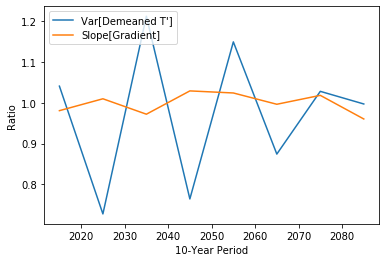

In [64]:
flist2=[2015,2025,2035,2045,2055,2065,2075,2085]
# Plotting time series
plt.plot(flist2, sdlist, label="Var[Demeaned T']")
plt.plot(flist2, slplist, label="Slope[Gradient]")

plt.legend(loc='upper left')
plt.ylabel('Ratio')
plt.xlabel('10-Year Period')

plt.show()

### raw surface temperature

In [2]:
# t2m reading
data_t2m=xr.load_dataset('/project2/geos39650/jet_stream/data/df_lat_20_1D.nc')

In [9]:
# select given lat/lon
select_t2m = data_t2m.sel(longitude=272.5)
select_t2m = select_t2m.sel(latitude=42)
select_t2m

<xarray.Dataset>
Dimensions:    (time: 3429)
Coordinates:
  * time       (time) datetime64[ns] 1980-12-01 1980-12-02 ... 2018-02-28
    latitude   float32 42.0
    longitude  float32 272.5
Data variables:
    t2m        (time) float32 279.75763 277.55292 ... 277.69318 279.82587

In [10]:
# sepearate into 5-yearly like Ivan's format, Dec-March 
def decade_separator(year,month,ymin,ymax):
    return ((year < ymax) & (year > ymin)) | ((year == ymax) & (month <= 3)) | ((year == ymin) & (month >=12))

In [11]:
dlist=[1980,1985,1990,1995,2000,2005,2010,2015]
for x in dlist:
    globals()['t2m%s' % x] = select_t2m.sel(time=decade_separator(select_t2m['time.year'],select_t2m['time.month'],x,x+5))

In [25]:
xlist=[]
xlist.append('hey')
xlist.append('ha')
xlist

['hey', 'ha']

In [26]:
# take variance for each dataset and compile into dataframe
xlist=[]
for x in dlist:
    ent = np.std(globals()['t2m%s' % x].to_dataframe()['t2m'])
    xlist.append(ent)

### Tref extract

In [63]:
dlist=[1980,1985,1990,1995,2000,2005,2010,2015]
#dlist=[1980]
zlist=[]
for x in dlist:
    data=xr.load_dataset('/project2/geos39650/jet_stream/data/model_output/tref/t_ref_test_blobs_no_resample_' + str(x) + '-12-01_' + str(x+5) + '-03-01.nc4')
    select=data.sel(longitude=272.5)
    select=select.sel(latitude=42)
    ent = np.std(select.to_dataframe()['__xarray_dataarray_variable__'])
    zlist.append(ent)

In [64]:
zlist

[0.8788118294338236,
 0.8225449067495515,
 0.8156229445116852,
 0.8432685870640272,
 0.788130735205368,
 0.8699932945571728,
 0.8516634408268736,
 0.8202129851496179]

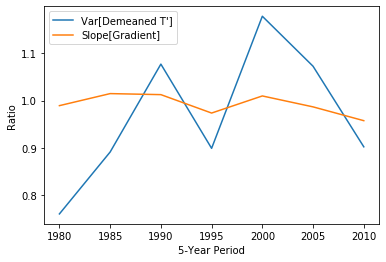

In [15]:
dlist2=[1980,1985,1990,1995,2000,2005,2010]
# Plotting time series
plt.plot(dlist2, sdlist, label="Var[Demeaned T']")
plt.plot(dlist2, slplist, label="Slope[Gradient]")

plt.legend(loc='upper left')
plt.ylabel('Ratio')
plt.xlabel('5-Year Period')

plt.show()

### Tprime extract

In [58]:
dlist=[1980,1985,1990,1995,2000,2005,2010,2015]
#dlist=[1980]
ylist=[]
for x in dlist:
    data=xr.load_dataset('/project2/geos39650/jet_stream/data/model_output/tprime/t_prime_test_blobs_no_resample_' + str(x) + '-12-01_' + str(x+5) + '-03-01.nc4')
    select=data.sel(longitude=272.5)
    select=select.sel(latitude=42)
    ent = np.std(select.to_dataframe()['__xarray_dataarray_variable__'])
    ylist.append(ent)                                                         
                                          

In [59]:
ylist

[6.505552199407116,
 5.093189742520254,
 5.368471340963178,
 5.450230722767912,
 5.153398376184399,
 5.188605841623359,
 5.728531433026025,
 5.3316287979639405]

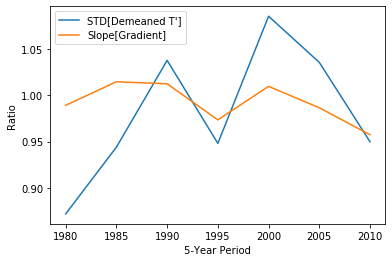

In [23]:
dlist2=[1980,1985,1990,1995,2000,2005,2010]
# Plotting time series
plt.plot(dlist2, sdlist, label="STD[Demeaned T']")
plt.plot(dlist2, slplist, label="Slope[Gradient]")

plt.legend(loc='upper left')
plt.ylabel('Ratio')
plt.xlabel('5-Year Period')

plt.show()

### demeaned Tprime extract

In [65]:
# t2m reading
data_demT=xr.load_dataset('/project2/geos39650/jet_stream/data/demean_t_prime_1980_2020.nc4')

In [67]:
# select given lat/lon
select_demT = data_demT.sel(longitude=272.5)
select_demT = select_demT.sel(latitude=42)
select_demT

<xarray.Dataset>
Dimensions:    (time: 3429)
Coordinates:
    latitude   float32 42.0
    longitude  float32 272.5
  * time       (time) datetime64[ns] 1980-12-01 1980-12-02 ... 2018-02-28
    dayofyear  (time) int64 336 337 338 339 340 341 342 ... 53 54 55 56 57 58 59
Data variables:
    t_prime    (time) float64 2.262 3.391 -2.898 -2.112 ... 3.188 5.51 8.806

In [68]:
# sepearate into 5-yearly like Ivan's format, Dec-March 
def decade_separator(year,month,ymin,ymax):
    return ((year < ymax) & (year > ymin)) | ((year == ymax) & (month <= 3)) | ((year == ymin) & (month >=12))

In [69]:
dlist=[1980,1985,1990,1995,2000,2005,2010,2015]
for x in dlist:
    globals()['demT%s' % x] = select_demT.sel(time=decade_separator(select_demT['time.year'],select_demT['time.month'],x,x+5))
    

In [71]:
# take variance for each dataset and compile into dataframe
wlist=[]
for x in dlist:
    ent = np.std(globals()['demT%s' % x].to_dataframe()['t_prime'])
    wlist.append(ent)

In [72]:
wlist

[5.848349586271088,
 5.098639044037664,
 4.8129760092063725,
 4.995085314212135,
 4.735801181090743,
 5.140992272198057,
 5.324367995424301,
 5.05697229966396]

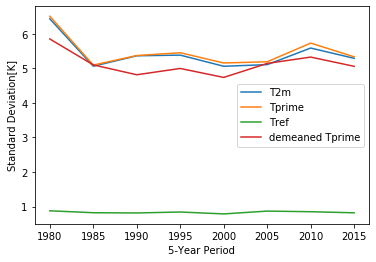

In [76]:
# Plotting time series
plt.plot(dlist, xlist, label="T2m")
plt.plot(dlist, ylist, label="Tprime")
plt.plot(dlist, zlist, label="Tref")
plt.plot(dlist, wlist, label="demeaned Tprime")

plt.legend(loc='center right')
plt.ylabel('Standard Deviation[K]')
plt.xlabel('5-Year Period')

plt.show()

### Sectioning for Seasonal Time Series 

In [2]:
# subsetting functions
os.chdir('/home/yuqisong/jetstream/reanalysis_getter')
from src.analyzer import reader_n_cutter
from pathlib import Path

In [ ]:
# Ivan's code
# Get list of all .nc files
paths_to_files = list(Path('/project2/geos39650/jet_stream/complete_year_data/cdsapi_requested_files/').rglob('*.nc'))
# Cut files in time and space
resample_files = reader_n_cutter(path_to_file=paths_to_files,
                    spatial_selection=20,
                    resample_window='1 week',
                    save_local=True,
                    regex=True)

In [2]:
data_all=xr.load_dataset("/project2/geos39650/jet_stream/data/t2m_complete_year_weekly_north.nc")

In [3]:
# select given lat/lon at Chicago & Hohhot
select_data1 = data_all.sel(longitude=111.75)
select_data1 = select_data1.sel(latitude=41)
select_data1

<xarray.Dataset>
Dimensions:    (time: 2175)
Coordinates:
    longitude  float32 111.75
    latitude   float32 41.0
  * time       (time) datetime64[ns] 1979-01-07 1979-01-14 ... 2020-01-05
Data variables:
    t2m        (time) float32 260.27237 256.71536 ... 260.04807 251.10437

In [4]:
# select given lat/lon at Chicago & Hohhot
select_data2 = data_all.sel(longitude=360-87.5)
select_data2 = select_data2.sel(latitude=42)
select_data2

<xarray.Dataset>
Dimensions:    (time: 2175)
Coordinates:
    longitude  float32 272.5
    latitude   float32 42.0
  * time       (time) datetime64[ns] 1979-01-07 1979-01-14 ... 2020-01-05
Data variables:
    t2m        (time) float32 260.31772 261.48715 ... 278.20782 275.11697

In [6]:
# transform to pd
loc1 = select_data1.to_dataframe().reset_index()
loc2 = select_data2.to_dataframe().reset_index()
loc2

,time,longitude,latitude,t2m
0,1979-01-07,272.5,42.0,260.317719
1,1979-01-14,272.5,42.0,261.487152
2,1979-01-21,272.5,42.0,264.971954
3,1979-01-28,272.5,42.0,268.500946
4,1979-02-04,272.5,42.0,266.200836
...,...,...,...,...
2170,2019-12-08,272.5,42.0,275.568054
2171,2019-12-15,272.5,42.0,273.693695
2172,2019-12-22,272.5,42.0,272.558685
2173,2019-12-29,272.5,42.0,278.207825


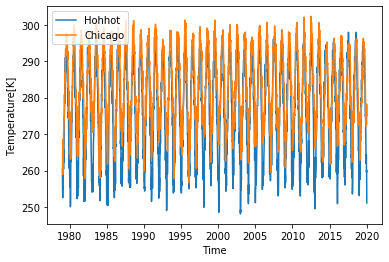

In [7]:
# Plotting time series
plt.plot(loc1.time, loc1.t2m, label="Hohhot")
plt.plot(loc2.time, loc2.t2m, label="Chicago")

plt.legend(loc='upper left')
plt.ylabel('Temperature[K]')
plt.xlabel('Time')
plt.show()

In [8]:
# Output for save
loc1.to_csv('/project2/geos39650/jet_stream/data/hohhot_full_t2m.csv',index=True)
loc2.to_csv('/project2/geos39650/jet_stream/data/chicago_full_t2m.csv',index=True)

## Easy display of projection data

In [20]:
proj1=xr.load_dataset("/project2/geos39650/jet_stream/data/GFDL-CM4_ssp585_tas.nc4")
proj2=xr.load_dataset("/project2/geos39650/jet_stream/data/MIROC6_ssp585_tas.nc4")

In [39]:
glob1=proj1.mean(dim=['lat','lon'])
glob2=proj2.mean(dim=['lat','lon'])
glob1

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 1032)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 2.0
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    time_bnds  (time, bnds) object 2015-01-01 00:00:00 ... 2101-01-01 00:00:00
Data variables:
    tas        (time) float32 276.22412 275.73373 ... 282.59766 282.71906

In [59]:
plot1=glob1.to_dataframe().reset_index().reset_index().iloc[0:1020,:]
plot2=glob2.to_dataframe().reset_index().reset_index().iloc[0:1020,:]
plot1

,index,bnds,time,height,tas,time_bnds
0,0,1.0,2015-01-16 12:00:00,2.0,276.224121,2015-01-01 00:00:00
1,1,1.0,2015-02-15 00:00:00,2.0,275.733734,2015-02-01 00:00:00
2,2,1.0,2015-03-16 12:00:00,2.0,275.654907,2015-03-01 00:00:00
3,3,1.0,2015-04-16 00:00:00,2.0,276.459229,2015-04-01 00:00:00
4,4,1.0,2015-05-16 12:00:00,2.0,278.458344,2015-05-01 00:00:00
...,...,...,...,...,...,...
1015,1015,1.0,2099-08-16 12:00:00,2.0,284.938141,2099-08-01 00:00:00
1016,1016,1.0,2099-09-16 00:00:00,2.0,284.022980,2099-09-01 00:00:00
1017,1017,1.0,2099-10-16 12:00:00,2.0,282.945160,2099-10-01 00:00:00
1018,1018,1.0,2099-11-16 00:00:00,2.0,282.553192,2099-11-01 00:00:00


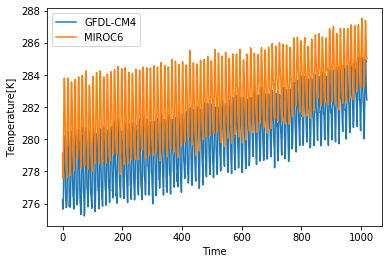

In [61]:
# Plotting time series
plt.plot(plot1.index, plot1.tas, label="GFDL-CM4")
plt.plot(plot2.index, plot2.tas, label="MIROC6")

plt.legend(loc='upper left')
plt.ylabel('Temperature[K]')
plt.xlabel('Time')
plt.show()

## Add monthly plot by Amanda's code

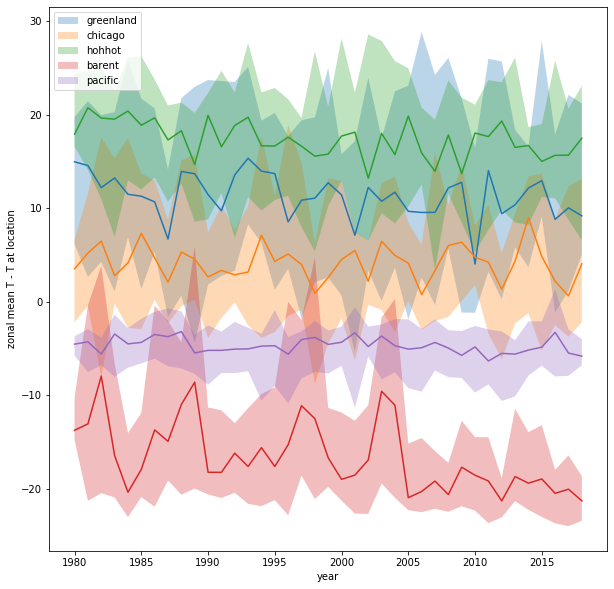

In [2]:
# yearly plot reproduce
deltaT_pd = pd.read_csv('/scratch/midway2/afarah/jetstream/deltaT_weekly.csv')
deltaT_pd['time'] = pd.to_datetime(deltaT_pd['time'])
places = dict({'greenland': (71.75,360-42.5), 
               'chicago': (42,360-87.5),
               'hohhot': (41,111.75),
               'barent': (75,40.5),
               'pacific': (41.5,179.5)
              })
by_year = deltaT_pd.groupby(deltaT_pd['time'].dt.year).agg(['median', 'min', 'max'])
fig= plt.figure(figsize=(10,10))
for place in places:
    mins = by_year[place]['min']
    maxs = by_year[place]['max']
    meds = by_year[place]['median']
    plt.fill_between(by_year.index,mins,maxs,alpha=0.3,label=place)
    plt.plot(meds)
plt.legend(loc='upper left')
plt.xlabel('year')
plt.ylabel('zonal mean T - T at location') 
plt.show()

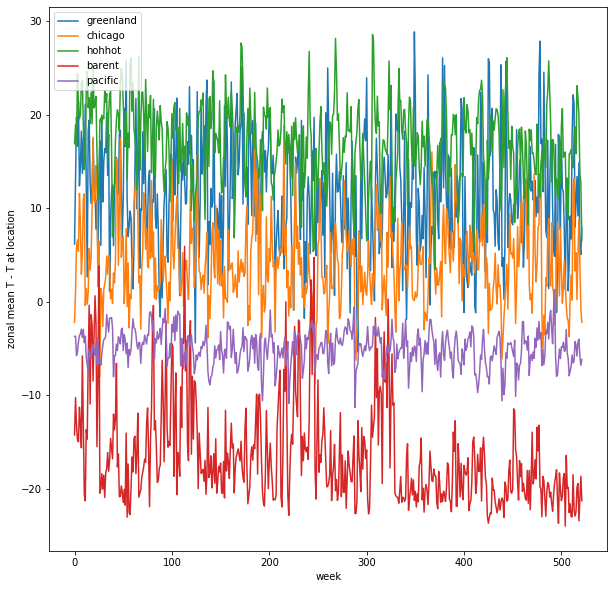

In [7]:
# weekly plot reproduce
deltaT_pd = pd.read_csv('/scratch/midway2/afarah/jetstream/deltaT_weekly.csv')
deltaT_pd['time'] = pd.to_datetime(deltaT_pd['time'])
places = dict({'greenland': (71.75,360-42.5), 
               'chicago': (42,360-87.5),
               'hohhot': (41,111.75),
               'barent': (75,40.5),
               'pacific': (41.5,179.5)
              })
fig= plt.figure(figsize=(10,10))
for place in places:
    meds = deltaT_pd[place]
    plt.plot(meds, label=place)
plt.legend(loc='upper left')
plt.xlabel('week')
plt.ylabel('zonal mean T - T at location') 
plt.show()

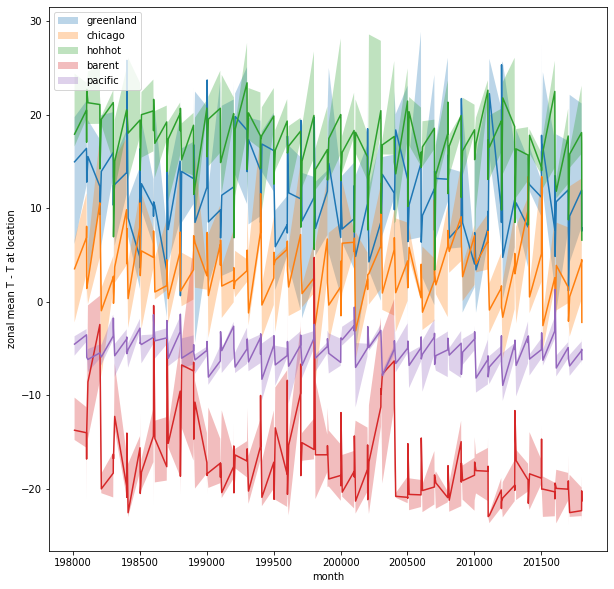

In [13]:
# monthly plot reproduce
deltaT_pd = pd.read_csv('/scratch/midway2/afarah/jetstream/deltaT_weekly.csv')
deltaT_pd['time'] = pd.to_datetime(deltaT_pd['time'])
deltaT_pd['year'] = deltaT_pd['time'].dt.year
deltaT_pd['month'] = deltaT_pd['time'].dt.month
deltaT_pd['monthyear'] = deltaT_pd['year']*100 + deltaT_pd['month']
by_month = deltaT_pd.groupby(deltaT_pd['monthyear']).agg(['median', 'min', 'max'])
fig= plt.figure(figsize=(10,10))
for place in places:
    mins = by_month[place]['min']
    maxs = by_month[place]['max']
    meds = by_month[place]['median']
    plt.fill_between(by_month.index,mins,maxs,alpha=0.3,label=place)
    plt.plot(meds)
plt.legend(loc='upper left')
plt.xlabel('month')
plt.ylabel('zonal mean T - T at location') 
plt.show()

In [66]:
#convert to radians because fuck degrees
if data_array['latitude'][0] >80: #just to make sure i dont do the multiplication twice
    data_array['latitude'] *= np.pi/180
    data_array['longitude'] *= np.pi/180
data_array

,latitude,longitude,time,t2m,area_grid,temp_bracket
0,1.570796,0.000000,2007-12-02,255.99916,4.726606e-14,"(251, 256]"
1,1.570796,0.000000,2007-12-09,257.67792,4.726606e-14,"(256, 261]"
2,1.570796,0.000000,2007-12-16,254.52310,4.726606e-14,"(251, 256]"
3,1.570796,0.000000,2007-12-23,250.64710,4.726606e-14,"(246, 251]"
4,1.570796,0.000000,2007-12-30,249.62552,4.726606e-14,"(246, 251]"
...,...,...,...,...,...,...
5644795,0.353429,6.278822,2008-02-03,289.98940,7.242024e+02,"(286, 291]"
5644796,0.353429,6.278822,2008-02-10,293.87262,7.242024e+02,"(291, 296]"
5644797,0.353429,6.278822,2008-02-17,296.12430,7.242024e+02,"(296, 301]"
5644798,0.353429,6.278822,2008-02-24,294.18283,7.242024e+02,"(291, 296]"


In [1]:
#make temperature bins
Tmin = min(data_array.t2m)
Tmax = max(data_array.t2m) #kelvin
Tbins = range(int(Tmin),int(Tmax),5)
weeks = range(len(data_array['time'].unique())) #should be 14 weeks, but just in case, this makes it flexible
times = data_array.time
times[0]

NameError: name 'data_array' is not defined

### All Data Histograms

In [2]:
data_all=xr.load_dataset("/project2/geos39650/jet_stream/data/df_lat_20_1W.nc")

In [3]:
data_all['time.month']

<xarray.DataArray 'month' (time: 522)>
array([12, 12, 12, 12,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12, 12, 12, 12,
        1,  1,  1,  1,  1,  2,  2,  2,  2, 12, 12, 12, 12,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  3, 12, 12, 12, 12,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  3, 12, 12, 12, 12, 12,  1,  1,  1,  1,  2,  2,  2,  2,  3,
       12, 12, 12, 12, 12,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12, 12, 12,
       12,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12, 12, 12, 12,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  3, 12, 12, 12, 12,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  3, 12, 12, 12, 12, 12,  1,  1,  1,  1,  2,  2,  2,  2,
        3, 12, 12, 12, 12, 12,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12, 12,
       12, 12, 12,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12, 12, 12, 12,  1,
        1,  1,  1,  1,  2,  2,  2,  2, 12, 12, 12, 12,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  3, 12, 12, 12, 12,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  3, 12, 12, 12, 12, 12,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12,
       12, 12, 12, 12,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12, 12, 12, 12,
        1,  1,  1,  1,  2,  2,  2,  2,  3, 12, 12, 12, 12,  1,  1,  1,  1,
        1,  2,  2,  2,  2, 12, 12, 12, 12,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  3, 12, 12, 12, 12, 12,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12,
       12, 12, 12, 12,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12, 12, 12, 12,
       12,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12, 12, 12, 12,  1,  1,  1,
        1,  2,  2,  2,  2,  2, 12, 12, 12, 12,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  3, 12, 12, 12, 12,  1,  1,  1,  1,  1,  2,  2,  2,  2,  3,
       12, 12, 12, 12, 12,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12, 12, 12,
       12, 12,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12, 12, 12, 12,  1,  1,
        1,  1,  2,  2,  2,  2,  3, 12, 12, 12, 12,  1,  1,  1,  1,  1,  2,
        2,  2,  2, 12, 12, 12, 12,  1,  1,  1,  1,  1,  2,  2,  2,  2,  3,
       12, 12, 12, 12,  1,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12, 12, 12,
       12, 12,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12, 12, 12, 12, 12,  1,
        1,  1,  1,  2,  2,  2,  2,  3, 12, 12, 12, 12,  1,  1,  1,  1,  2,
        2,  2,  2,  3, 12, 12, 12, 12,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        3, 12, 12, 12, 12,  1,  1,  1,  1,  1,  2,  2,  2,  2,  3, 12, 12,
       12, 12, 12,  1,  1,  1,  1,  2,  2,  2,  2,  3])
Coordinates:
  * time     (time) datetime64[ns] 1980-12-07 1980-12-14 ... 2018-03-04

In [4]:
# select winters by decades
# sepearate into decades
def decade_separator(year,month,ymin,ymax):
    return ((year <= ymax) & (year > ymin)) | ((year == ymax + 1) & (month <= 3)) | ((year == ymin) & (month >=11))

In [5]:
dlist=[1980,1990,2000,2010]
for x in dlist:
    globals()['all%s' % x] = data_all.sel(time=decade_separator(data_all['time.year'],data_all['time.month'],x,x+9))

In [6]:
all2000

<xarray.Dataset>
Dimensions:    (latitude: 280, longitude: 1440, time: 137)
Coordinates:
  * time       (time) datetime64[ns] 2000-12-03 2000-12-10 ... 2010-02-28
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 20.75 20.5 20.25
Data variables:
    t2m        (time, latitude, longitude) float32 250.79353 ... 302.7852

In [7]:
# select given lat/lon
select_data = data_all.sel(longitude=111.75)
select_data = select_data.sel(latitude=41)
select_data

<xarray.Dataset>
Dimensions:    (time: 522)
Coordinates:
  * time       (time) datetime64[ns] 1980-12-07 1980-12-14 ... 2018-03-04
    longitude  float32 111.75
    latitude   float32 41.0
Data variables:
    t2m        (time) float32 259.77557 257.73813 ... 264.0221 270.0939

In [8]:
# select location data extract into decades
dlist=[1980,1990,2000,2010]
for x in dlist:
    globals()['decade%s' % x] = select_data.sel(time=decade_separator(select_data['time.year'],select_data['time.month'],x,x+9))

In [10]:
decade1980

<xarray.Dataset>
Dimensions:    (time: 137)
Coordinates:
  * time       (time) datetime64[ns] 1980-12-07 1980-12-14 ... 1990-03-04
    longitude  float32 111.75
    latitude   float32 41.0
Data variables:
    t2m        (time) float32 259.77557 257.73813 ... 259.65228 261.17697

In [9]:
# range of bins
temp_all = select_data.to_dataframe()
temp_all = temp_all.t2m
Tmin = np.floor(np.min(temp_all))
Tmax = np.ceil(np.max(temp_all))
Hbins = np.linspace(Tmin,Tmax,50)
temp_all
Hbins

array([248.        , 248.53061224, 249.06122449, 249.59183673,
       250.12244898, 250.65306122, 251.18367347, 251.71428571,
       252.24489796, 252.7755102 , 253.30612245, 253.83673469,
       254.36734694, 254.89795918, 255.42857143, 255.95918367,
       256.48979592, 257.02040816, 257.55102041, 258.08163265,
       258.6122449 , 259.14285714, 259.67346939, 260.20408163,
       260.73469388, 261.26530612, 261.79591837, 262.32653061,
       262.85714286, 263.3877551 , 263.91836735, 264.44897959,
       264.97959184, 265.51020408, 266.04081633, 266.57142857,
       267.10204082, 267.63265306, 268.16326531, 268.69387755,
       269.2244898 , 269.75510204, 270.28571429, 270.81632653,
       271.34693878, 271.87755102, 272.40816327, 272.93877551,
       273.46938776, 274.        ])

In [34]:
# histograms by 4 decades
for x in dlist:
    globals()['loc%s' % x] = globals()['decade%s' % x].to_dataframe()

In [35]:
loc1980

,longitude,latitude,t2m
time,,,
1980-12-07,111.75,41.0,259.775574
1980-12-14,111.75,41.0,257.738129
1980-12-21,111.75,41.0,260.071564
1980-12-28,111.75,41.0,252.282608
1981-01-04,111.75,41.0,255.722412
...,...,...,...
1990-02-04,111.75,41.0,254.356079
1990-02-11,111.75,41.0,262.515717
1990-02-18,111.75,41.0,267.871613


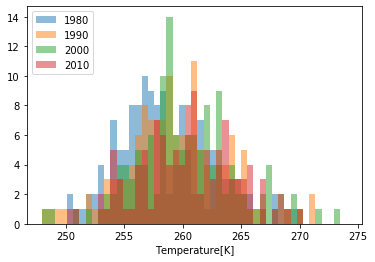

In [14]:
for x in dlist:
    plt.hist(globals()['loc%s' % x].t2m, Hbins, alpha=0.5, label=x)
plt.legend(loc='upper left')
plt.xlabel('Temperature[K]')
plt.show()

In [15]:
print(loc1980.shape)
print(loc1990.shape)
print(loc2000.shape)
print(loc2010.shape)

(137, 3)
(137, 3)
(137, 3)
(111, 3)


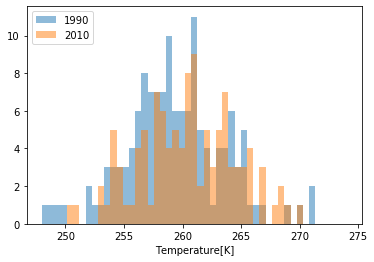

In [16]:
plt.hist(loc1990.t2m, Hbins, alpha=0.5, label='1990')
plt.hist(loc2010.t2m, Hbins, alpha=0.5, label='2010')
plt.legend(loc='upper left')
plt.xlabel('Temperature[K]')
plt.show()

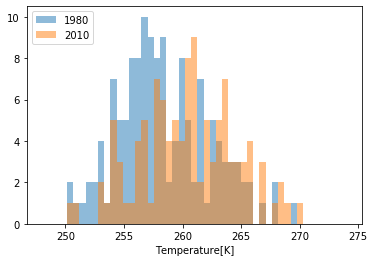

In [17]:
# only first and last decade
plt.hist(loc1980.t2m, Hbins, alpha=0.5, label='1980')
plt.hist(loc2010.t2m, Hbins, alpha=0.5, label='2010')
plt.legend(loc='upper left')
plt.xlabel('Temperature[K]')
plt.show()

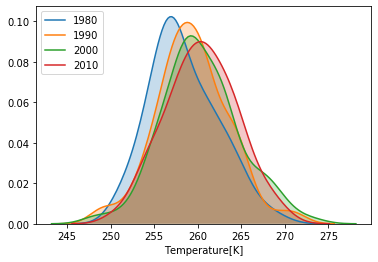

In [14]:
# KDE plots
for x in dlist:
    sns.kdeplot(globals()['loc%s' % x].t2m, shade=True, label=x)
plt.legend(loc='upper left')
plt.xlabel('Temperature[K]')
plt.show()

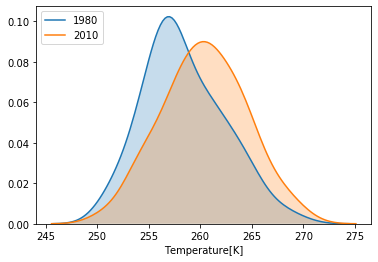

In [15]:
# KDE plots, 2 decades
sns.kdeplot(loc1980.t2m, shade=True, label='1980')
sns.kdeplot(loc2010.t2m, shade=True, label='2010')
plt.legend(loc='upper left')
plt.xlabel('Temperature[K]')
plt.show()

In [15]:
# separate by winters
# testing winter 1980
testdata = select_data.sel(time=decade_separator(select_data['time.year'],select_data['time.month'],1980,1980))
testdata

<xarray.Dataset>
Dimensions:    (time: 13)
Coordinates:
  * time       (time) datetime64[ns] 1980-12-07 1980-12-14 ... 1981-03-01
    longitude  float32 111.75
    latitude   float32 41.0
Data variables:
    t2m        (time) float32 259.77557 257.73813 ... 261.3449 253.96474

In [18]:
# Harmonic demeaning for temperature, test location Hohhot
hohhot = select_data.to_dataframe()
hohhot = hohhot.reset_index()
hohhot = hohhot[['time','t2m']]
hohhot = hohhot.rename(columns={"time": "ds", "t2m": "y"})
hohhot

,ds,y
0,1980-12-07,259.775574
1,1980-12-14,257.738129
2,1980-12-21,260.071564
3,1980-12-28,252.282608
4,1981-01-04,255.722412
...,...,...
517,2018-02-04,254.830566
518,2018-02-11,256.770935
519,2018-02-18,262.920441
520,2018-02-25,264.022095


In [25]:
m = Prophet()
m.fit(hohhot)
future = m.make_future_dataframe(periods=0)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


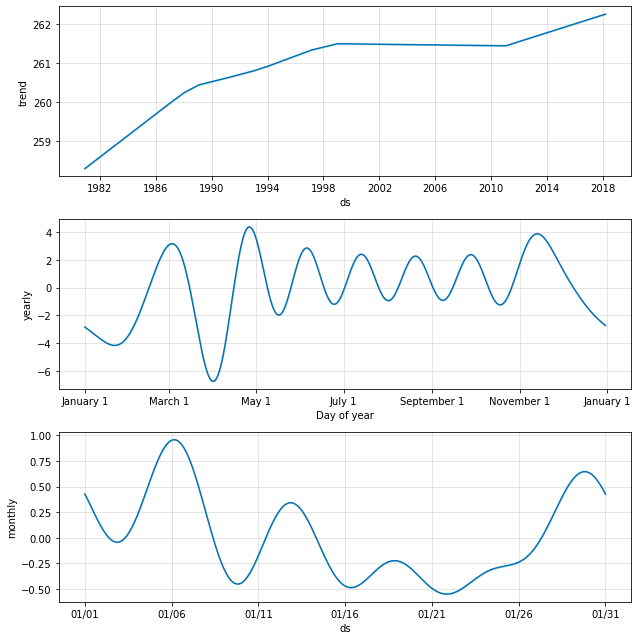

In [26]:
# add seasonality
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(hohhot).predict(future)
fig = m.plot_components(forecast)

In [27]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-12-07,258.295593,254.200070,262.809044,258.295593,258.295593,0.180047,0.180047,0.180047,-0.042087,-0.042087,-0.042087,0.222134,0.222134,0.222134,0.0,0.0,0.0,258.475640
1,1980-12-14,258.300886,253.009508,261.289373,258.300886,258.300886,-1.323320,-1.323320,-1.323320,-0.452752,-0.452752,-0.452752,-0.870568,-0.870568,-0.870568,0.0,0.0,0.0,256.977567
2,1980-12-21,258.306179,251.763464,260.277895,258.306179,258.306179,-2.254378,-2.254378,-2.254378,-0.468759,-0.468759,-0.468759,-1.785619,-1.785619,-1.785619,0.0,0.0,0.0,256.051802
3,1980-12-28,258.311472,251.312674,259.820286,258.311472,258.311472,-2.886669,-2.886669,-2.886669,-0.387698,-0.387698,-0.387698,-2.498970,-2.498970,-2.498970,0.0,0.0,0.0,255.424804
4,1981-01-04,258.316766,250.968203,260.385056,258.316766,258.316766,-2.514263,-2.514263,-2.514263,0.564773,0.564773,0.564773,-3.079036,-3.079036,-3.079036,0.0,0.0,0.0,255.802502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2018-02-04,262.250512,255.168295,263.909318,262.250512,262.250512,-2.838458,-2.838458,-2.838458,0.028726,0.028726,0.028726,-2.867184,-2.867184,-2.867184,0.0,0.0,0.0,259.412055
518,2018-02-11,262.252695,256.387913,264.685826,262.252695,262.252695,-1.547652,-1.547652,-1.547652,-0.387910,-0.387910,-0.387910,-1.159742,-1.159742,-1.159742,0.0,0.0,0.0,260.705043
519,2018-02-18,262.254877,258.414407,266.964554,262.254877,262.254877,0.424122,0.424122,0.424122,-0.406798,-0.406798,-0.406798,0.830921,0.830921,0.830921,0.0,0.0,0.0,262.679000
520,2018-02-25,262.257060,259.876978,268.772861,262.257060,262.257060,2.201610,2.201610,2.201610,-0.335636,-0.335636,-0.335636,2.537246,2.537246,2.537246,0.0,0.0,0.0,264.458670


In [29]:
forecast.yhat - hohhot.y

0     -1.299934
1     -0.760562
2     -4.019762
3      3.142196
4      0.080090
         ...   
517    4.581488
518    3.934108
519   -0.241441
520    0.436575
521   -4.244634
Length: 522, dtype: float64

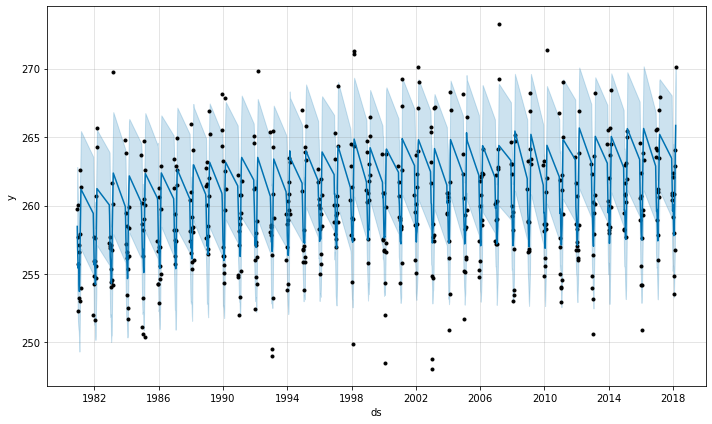

In [28]:
fig1 = m.plot(forecast)

In [32]:
resid = hohhot.y - forecast.yhat
netdata = pd.DataFrame(data={'time': hohhot.ds, 'temp_resid': resid})
netdata

,time,temp_resid
0,1980-12-07,1.299934
1,1980-12-14,0.760562
2,1980-12-21,4.019762
3,1980-12-28,-3.142196
4,1981-01-04,-0.080090
...,...,...
517,2018-02-04,-4.581488
518,2018-02-11,-3.934108
519,2018-02-18,0.241441
520,2018-02-25,-0.436575


In [39]:
print(loc1980.shape)
print(loc1990.shape)
print(loc2000.shape)
print(loc2010.shape)

(137, 3)
(137, 3)
(137, 3)
(111, 3)


In [40]:
resid1980 = netdata.iloc[0:137,:]
resid1990 = netdata.iloc[137:274,:]
resid2000 = netdata.iloc[274:411,:]
resid2010 = netdata.iloc[411:522,:]
resid2000

,time,temp_resid
274,2000-12-03,0.459775
275,2000-12-10,1.009927
276,2000-12-17,-1.316067
277,2000-12-24,0.688287
278,2000-12-31,0.079396
...,...,...
406,2010-01-31,-0.433215
407,2010-02-07,1.443607
408,2010-02-14,-2.251001
409,2010-02-21,-0.861862


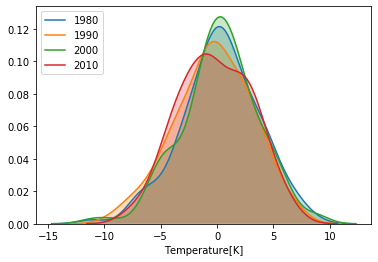

In [42]:
# KDE plots
for x in dlist:
    sns.kdeplot(globals()['resid%s' % x].temp_resid, shade=True, label=x)
plt.legend(loc='upper left')
plt.xlabel('Temperature[K]')
plt.show()

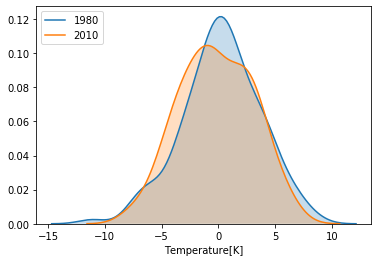

In [43]:
# KDE plots, 2 decades
sns.kdeplot(resid1980.temp_resid, shade=True, label='1980')
sns.kdeplot(resid2010.temp_resid, shade=True, label='2010')
plt.legend(loc='upper left')
plt.xlabel('Temperature[K]')
plt.show()

In [19]:
# Amanda's function for effective latitudes
# remember each of them apply to one period only!!! Average across number of periods taken in
def dists_of_areas(temp_df,lat,Tbins):
    #weight entry by box area so that y axis is no longer the number of boxes, but rather the area taken up by each box
    #this is the area of each grid cell
    R_earth = 6367.47 #km
    dphi = 0.25*np.pi/180. #temperature data grid size, in radians
    areas = (R_earth*dphi)**2 * np.cos(lat)
    pdf_areas, binedges = np.histogram(temp_df,bins=Tbins,weights=areas)
    cdf_areas=np.cumsum(pdf_areas)
    return binedges[:-1], pdf_areas, cdf_areas

#convert area to effective latitude
def dists_of_lat_eff(temp_df,lat,Tbins):
    #first obtain cdf of areas
    R_earth = 6367.47 #km
    dphi = 0.25*np.pi/180. #radians, this is also dlambda
    binedges,pdf_areas,cdf_areas = dists_of_areas(temp_df,lat,Tbins)
    #A = 2piR^2 (1-sin(lat_eff))
    #so 1-A/(2piR^2) = sin(lat_eff)
    #but remember latitude is defined to start at pi at the north pole
    cdf_lat_eff = np.pi/2.-np.arccos(1-cdf_areas / (2*np.pi*R_earth**2) )
    return binedges, cdf_lat_eff

def T_ref(temp_df,lat,Tbins):
    #first obtain cdf of effective lat
    binedges,cdf_lat_effs = dists_of_lat_eff(temp_df,lat,Tbins)
    #interpolate to get T_ref
    T_ref = np.interp(lat,np.flip(cdf_lat_effs),np.flip(binedges))
    return binedges, T_ref

# custom feeding into effective latitude functions
def true_T_to_lat_eff(temp_df,lat,binedges,cdf_lat_effs):
    #calculate effective latitude
    lat_eff = np.interp(temp_df,binedges,cdf_lat_effs)
    #calculate difference to real latitude
    phi_prime = lat - lat_eff
    return lat_eff, phi_prime

In [20]:
#convert to dataframe! 
def convert_df(data_xarray): 
    df = data_xarray.to_dataframe()
    dff = df.reset_index()
    return dff

#mean across lat-lon!
def convert_mean(data_frame):
    mean = data_frame.groupby(['latitude','longitude']).mean()
    meant = mean.reset_index()
    return meant
    
#convert to radians because fuck degrees
def convert_radians(data_frame):
    lat = data_frame.latitude
    lon = data_frame.longitude
    lat *= np.pi/180
    lon *= np.pi/180
    return lat,lon

In [21]:
# convert all to df
df_select = convert_df(select_data)
df_select

,time,longitude,latitude,t2m
0,1980-12-07,317.5,71.75,245.492691
1,1980-12-14,317.5,71.75,238.377426
2,1980-12-21,317.5,71.75,231.907135
3,1980-12-28,317.5,71.75,235.012955
4,1981-01-04,317.5,71.75,230.197647
...,...,...,...,...
517,2018-02-04,317.5,71.75,242.477325
518,2018-02-11,317.5,71.75,236.788971
519,2018-02-18,317.5,71.75,245.760529
520,2018-02-25,317.5,71.75,246.609894


In [22]:
# convert all to df
df_all = convert_df(data_all)
df_all

,latitude,longitude,time,t2m
0,90.00,0.00,1980-12-07,245.146805
1,90.00,0.00,1980-12-14,247.610977
2,90.00,0.00,1980-12-21,249.565994
3,90.00,0.00,1980-12-28,242.002106
4,90.00,0.00,1981-01-04,245.176544
...,...,...,...,...
210470395,20.25,359.75,2018-02-04,297.020905
210470396,20.25,359.75,2018-02-11,291.952362
210470397,20.25,359.75,2018-02-18,293.523987
210470398,20.25,359.75,2018-02-25,296.699921


In [23]:
# take all lat/lon and convert
lat,lon = convert_radians(df_all)
lat

0            1.570796
1            1.570796
2            1.570796
3            1.570796
4            1.570796
               ...   
210470395    0.353429
210470396    0.353429
210470397    0.353429
210470398    0.353429
210470399    0.353429
Name: latitude, Length: 210470400, dtype: float64

In [24]:
df_all.assign(latitude=lat,longitude=lon)
df_all

,latitude,longitude,time,t2m
0,1.570796,0.000000,1980-12-07,245.146805
1,1.570796,0.000000,1980-12-14,247.610977
2,1.570796,0.000000,1980-12-21,249.565994
3,1.570796,0.000000,1980-12-28,242.002106
4,1.570796,0.000000,1981-01-04,245.176544
...,...,...,...,...
210470395,0.353429,6.278822,2018-02-04,297.020905
210470396,0.353429,6.278822,2018-02-11,291.952362
210470397,0.353429,6.278822,2018-02-18,293.523987
210470398,0.353429,6.278822,2018-02-25,296.699921


In [25]:
#make temperature bins
Tmin = np.min(data_all.t2m.values)
Tmax = np.max(data_all.t2m.values) #kelvin
Tbins = range(int(Tmin),int(Tmax),5)

In [18]:
Tbins

range(213, 305, 5)

In [26]:
# time stamps
times = df_select.reset_index().time
T = times.shape[0]

In [68]:
# setup
df_efflat_loc = pd.DataFrame(data={'time': times})
cdfcol = np.zeros((T,18))
loc_rad = 42*np.pi/180

In [71]:
# compute for all weeks! 
for t in range(T):
    binedges, cdf_lat_eff = dists_of_lat_eff(df_all.t2m[df_all.time==times[t]],df_all.latitude[df_all.time==times[t]],Tbins)
    cdfcol[t,:] = cdf_lat_eff

In [85]:
# save a copy
df_cdfeff_all = pd.concat([pd.DataFrame(binedges.reshape(-1, 18)), pd.DataFrame(cdfcol)]).reset_index(drop = True) 
df_cdfeff_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,213.000000,218.000000,223.000000,228.000000,233.000000,238.000000,243.000000,248.000000,253.000000,258.000000,263.000000,268.000000,273.000000,278.000000,283.000000,288.000000,293.000000,298.000000
1,1.570796,1.570796,1.556985,1.490941,1.439007,1.328295,1.199020,1.112768,1.042285,0.972737,0.903450,0.836047,0.755780,0.661191,0.564279,0.452877,0.360109,0.351249
2,1.570796,1.570796,1.570796,1.526883,1.437461,1.309964,1.171848,1.086127,1.012921,0.952783,0.894329,0.822202,0.735038,0.646363,0.548169,0.444251,0.358646,0.351249
3,1.570796,1.570796,1.551322,1.498457,1.440783,1.353446,1.193887,1.072879,1.021202,0.964689,0.902208,0.823393,0.719119,0.639029,0.540542,0.441190,0.356782,0.351249
4,1.570796,1.570796,1.562913,1.492385,1.405839,1.291495,1.150801,1.063937,1.002630,0.947815,0.896774,0.832258,0.719040,0.638603,0.535354,0.430892,0.353497,0.351249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,1.570796,1.570796,1.561046,1.497606,1.426255,1.331732,1.205055,1.088756,0.994943,0.932990,0.885282,0.821648,0.718126,0.636912,0.539806,0.430812,0.352058,0.351249
519,1.570796,1.570796,1.556652,1.504600,1.426397,1.347950,1.232424,1.111828,1.017417,0.945328,0.879713,0.815607,0.713051,0.636242,0.551283,0.442823,0.355016,0.351249
520,1.570796,1.568005,1.547103,1.506175,1.458843,1.383114,1.275245,1.151131,1.053972,0.972943,0.901994,0.827662,0.729774,0.650300,0.554235,0.440386,0.356957,0.351249
521,1.570796,1.570796,1.570796,1.562672,1.476841,1.371138,1.266566,1.175870,1.066287,0.952050,0.892100,0.819851,0.733194,0.646156,0.565211,0.453361,0.359440,0.351249


In [2]:
# save a copy
df_cdfeff_all.to_csv('~/jetstream/efflat_allcdf.csv',index=True)

NameError: name 'df_cdfeff_all' is not defined

In [9]:
df_cdfeff_all = pd.read_csv('~/jetstream/efflat_allcdf.csv')

In [4]:
binedges = df_cdfeff_all.iloc[0,:]
binedges = binedges[1:19]
binedges.shape

(18,)

In [5]:
cdf_eff_all = df_cdfeff_all.iloc[1:523,:]
cdf_eff_all = cdf_eff_all.drop('Unnamed: 0',axis=1)
cdf_eff_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,1.570796,1.570796,1.556985,1.490941,1.439007,1.328295,1.199020,1.112768,1.042285,0.972737,0.903450,0.836047,0.755780,0.661191,0.564279,0.452877,0.360109,0.351249
2,1.570796,1.570796,1.570796,1.526883,1.437461,1.309964,1.171848,1.086127,1.012921,0.952783,0.894329,0.822202,0.735038,0.646363,0.548169,0.444251,0.358646,0.351249
3,1.570796,1.570796,1.551322,1.498457,1.440783,1.353446,1.193887,1.072879,1.021202,0.964689,0.902208,0.823393,0.719119,0.639029,0.540542,0.441190,0.356782,0.351249
4,1.570796,1.570796,1.562913,1.492385,1.405839,1.291495,1.150801,1.063937,1.002630,0.947815,0.896774,0.832258,0.719040,0.638603,0.535354,0.430892,0.353497,0.351249
5,1.570796,1.570796,1.567070,1.490206,1.396935,1.285953,1.165427,1.081678,1.024241,0.971457,0.900744,0.819548,0.717824,0.630140,0.524388,0.426925,0.351953,0.351249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,1.570796,1.570796,1.561046,1.497606,1.426255,1.331732,1.205055,1.088756,0.994943,0.932990,0.885282,0.821648,0.718126,0.636912,0.539806,0.430812,0.352058,0.351249
519,1.570796,1.570796,1.556652,1.504600,1.426397,1.347950,1.232424,1.111828,1.017417,0.945328,0.879713,0.815607,0.713051,0.636242,0.551283,0.442823,0.355016,0.351249
520,1.570796,1.568005,1.547103,1.506175,1.458843,1.383114,1.275245,1.151131,1.053972,0.972943,0.901994,0.827662,0.729774,0.650300,0.554235,0.440386,0.356957,0.351249
521,1.570796,1.570796,1.570796,1.562672,1.476841,1.371138,1.266566,1.175870,1.066287,0.952050,0.892100,0.819851,0.733194,0.646156,0.565211,0.453361,0.359440,0.351249


In [6]:
lo1 = int(np.floor(0.025 * 137))
hi1 = int(np.ceil(0.975 * 137))

lo2 = int(np.floor(0.025 * 111))
hi2 = int(np.ceil(0.975 * 111))

In [7]:
cdf_eff80 = cdf_eff_all.iloc[0:137,:]
cdf_eff90 = cdf_eff_all.iloc[137:274,:]
cdf_eff00 = cdf_eff_all.iloc[274:411,:]
cdf_eff10 = cdf_eff_all.iloc[411:522,:]
cdf_eff10

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
412,1.570796,1.569282,1.541527,1.476057,1.415094,1.360615,1.275738,1.142960,1.064702,0.994274,0.931365,0.851501,0.761823,0.668729,0.586684,0.474199,0.366131,0.351249
413,1.570796,1.570796,1.543333,1.464427,1.395923,1.315813,1.215010,1.130109,1.059209,0.997001,0.921281,0.846623,0.754982,0.659419,0.579711,0.457818,0.359658,0.351249
414,1.570796,1.570796,1.570796,1.523386,1.438484,1.370657,1.264153,1.154201,1.054568,0.967221,0.897528,0.826700,0.733273,0.645885,0.554532,0.444204,0.356746,0.351249
415,1.570796,1.563332,1.552087,1.495585,1.411764,1.331448,1.241480,1.118040,1.036043,0.970396,0.905288,0.829327,0.729205,0.646681,0.564947,0.444828,0.353540,0.351249
416,1.570796,1.570796,1.570796,1.532585,1.462430,1.348581,1.195831,1.090637,1.013416,0.945371,0.885802,0.812288,0.724462,0.641229,0.540301,0.428237,0.353767,0.351249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,1.570796,1.570796,1.561046,1.497606,1.426255,1.331732,1.205055,1.088756,0.994943,0.932990,0.885282,0.821648,0.718126,0.636912,0.539806,0.430812,0.352058,0.351249
519,1.570796,1.570796,1.556652,1.504600,1.426397,1.347950,1.232424,1.111828,1.017417,0.945328,0.879713,0.815607,0.713051,0.636242,0.551283,0.442823,0.355016,0.351249
520,1.570796,1.568005,1.547103,1.506175,1.458843,1.383114,1.275245,1.151131,1.053972,0.972943,0.901994,0.827662,0.729774,0.650300,0.554235,0.440386,0.356957,0.351249
521,1.570796,1.570796,1.570796,1.562672,1.476841,1.371138,1.266566,1.175870,1.066287,0.952050,0.892100,0.819851,0.733194,0.646156,0.565211,0.453361,0.359440,0.351249


In [8]:
plotcol80 = np.zeros((18,3))
plotcol90 = np.zeros((18,3))
plotcol00 = np.zeros((18,3))
plotcol10 = np.zeros((18,3))

In [9]:
for t in range(18): 
    x = str(t)
    
    arr80 = cdf_eff80[x]
    sort80 = arr80.sort_values()
    plotcol80[t,0] = sort80.iloc[lo1-1]
    plotcol80[t,1] = sort80.iloc[hi1-1]
    plotcol80[t,2] = arr80.mean()
    
    arr90 = cdf_eff90[x]
    sort90 = arr90.sort_values()
    plotcol90[t,0] = sort90.iloc[lo1-1]
    plotcol90[t,1] = sort90.iloc[hi1-1]
    plotcol90[t,2] = arr90.mean()
    
    arr00 = cdf_eff00[x]
    sort00 = arr00.sort_values()
    plotcol00[t,0] = sort00.iloc[lo1-1]
    plotcol00[t,1] = sort00.iloc[hi1-1]
    plotcol00[t,2] = arr00.mean()
    
    arr10 = cdf_eff10[x]
    sort10 = arr10.sort_values()
    plotcol10[t,0] = sort10.iloc[lo2-1]
    plotcol10[t,1] = sort10.iloc[hi2-1]
    plotcol10[t,2] = arr10.mean()

In [10]:
plotcol10

array([[1.56771873, 1.57079633, 1.57071348],
       [1.5445465 , 1.57079633, 1.56759573],
       [1.48927539, 1.57079633, 1.54740019],
       [1.42681442, 1.56267213, 1.49907738],
       [1.35753193, 1.50690904, 1.42777542],
       [1.2741018 , 1.42901283, 1.34259274],
       [1.15598541, 1.32949446, 1.23401577],
       [1.055732  , 1.21283734, 1.12236899],
       [0.97414705, 1.12768739, 1.03859606],
       [0.91975289, 1.05871342, 0.97022222],
       [0.86152329, 0.9740823 , 0.90435036],
       [0.78999018, 0.87583568, 0.82657077],
       [0.70242886, 0.76465457, 0.73031694],
       [0.62233272, 0.67403003, 0.6444177 ],
       [0.52248353, 0.59070073, 0.55145965],
       [0.420931  , 0.48610381, 0.44317516],
       [0.35170583, 0.37750901, 0.35836334],
       [0.35124949, 0.35133978, 0.35125744]])

In [11]:
df_ploteff80 = pd.DataFrame(plotcol80)
df_ploteff80.columns = ['lower','higher','mid']

df_ploteff90 = pd.DataFrame(plotcol90)
df_ploteff90.columns = ['lower','higher','mid']

df_ploteff00 = pd.DataFrame(plotcol00)
df_ploteff00.columns = ['lower','higher','mid']

df_ploteff10 = pd.DataFrame(plotcol10)
df_ploteff10.columns = ['lower','higher','mid']

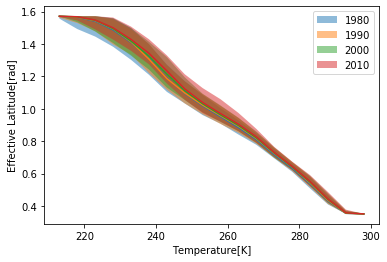

In [12]:
# plot the dragon lines
plt.plot(binedges, df_ploteff80.mid)
plt.fill_between(binedges, df_ploteff80.lower, df_ploteff80.higher, alpha=0.5, label="1980")

plt.plot(binedges, df_ploteff90.mid)
plt.fill_between(binedges, df_ploteff90.lower, df_ploteff90.higher, alpha=0.5, label="1990")

plt.plot(binedges, df_ploteff00.mid)
plt.fill_between(binedges, df_ploteff00.lower, df_ploteff00.higher, alpha=0.5, label="2000")

plt.plot(binedges, df_ploteff10.mid)
plt.fill_between(binedges, df_ploteff10.lower, df_ploteff10.higher, alpha=0.5, label="2010")

plt.legend(loc='upper right')
plt.xlabel('Temperature[K]')
plt.ylabel('Effective Latitude[rad]')
plt.show()

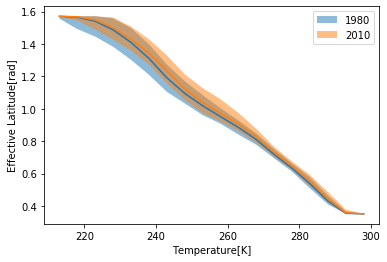

In [13]:
# plot the dragon lines
plt.plot(binedges, df_ploteff80.mid)
plt.fill_between(binedges, df_ploteff80.lower, df_ploteff80.higher, alpha=0.5, label="1980")

plt.plot(binedges, df_ploteff10.mid)
plt.fill_between(binedges, df_ploteff10.lower, df_ploteff10.higher, alpha=0.5, label="2010")

plt.legend(loc='upper right')
plt.xlabel('Temperature[K]')
plt.ylabel('Effective Latitude[rad]')
plt.show()

In [36]:
for x in dlist:
    globals()['eff%s' % x] = df_efflat_loc[decade_separator(df_efflat_loc.year,df_efflat_loc.month,x,x+9)]

In [37]:
phimin = min(df_efflat_loc.lat_eff)
phimax = max(df_efflat_loc.lat_eff)
phibins = np.linspace(phimin-0.01,phimax+0.01,50)
phibins

array([0.57058683, 0.58071511, 0.59084338, 0.60097166, 0.61109993,
       0.62122821, 0.63135649, 0.64148476, 0.65161304, 0.66174132,
       0.67186959, 0.68199787, 0.69212614, 0.70225442, 0.7123827 ,
       0.72251097, 0.73263925, 0.74276753, 0.7528958 , 0.76302408,
       0.77315235, 0.78328063, 0.79340891, 0.80353718, 0.81366546,
       0.82379374, 0.83392201, 0.84405029, 0.85417856, 0.86430684,
       0.87443512, 0.88456339, 0.89469167, 0.90481994, 0.91494822,
       0.9250765 , 0.93520477, 0.94533305, 0.95546133, 0.9655896 ,
       0.97571788, 0.98584615, 0.99597443, 1.00610271, 1.01623098,
       1.02635926, 1.03648754, 1.04661581, 1.05674409, 1.06687236])

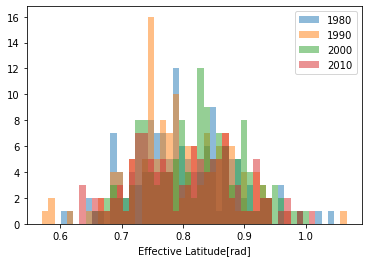

In [38]:
#Histograms!
for x in dlist:
    plt.hist(globals()['eff%s' % x].lat_eff, phibins, alpha=0.5, label=x)
plt.legend(loc='upper right')
plt.xlabel('Effective Latitude[rad]')
plt.show()

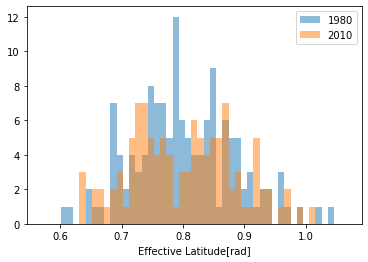

In [39]:
# only first and last decade
plt.hist(eff1980.lat_eff, phibins, alpha=0.5, label='1980')
plt.hist(eff2010.lat_eff, phibins, alpha=0.5, label='2010')
plt.legend(loc='upper right')
plt.xlabel('Effective Latitude[rad]')
plt.show()

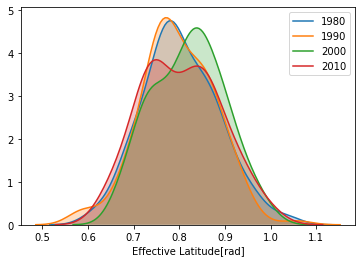

In [40]:
# KDE plots
for x in dlist:
    sns.kdeplot(globals()['eff%s' % x].lat_eff, shade=True, label=x)
plt.legend(loc='upper right')
plt.xlabel('Effective Latitude[rad]')
plt.show()

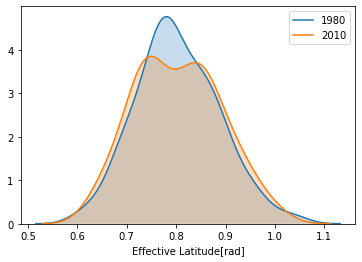

In [41]:
# KDE plots, 2 decades
sns.kdeplot(eff1980.lat_eff, shade=True, label='1980')
sns.kdeplot(eff2010.lat_eff, shade=True, label='2010')
plt.legend(loc='upper right')
plt.xlabel('Effective Latitude[rad]')
plt.show()

## Actually start analyzing 

In [78]:
#all analysis functions
def plots(binedges,pdf,xlab,cdf=None):
    if cdf is not None:
        plt.plot(binedges,cdf,label='cdf')
    plt.plot(binedges,pdf,label='pdf')
    plt.xlabel('bin edges [temp]')
    plt.ylabel(xlab)
    plt.legend()
    plt.show()
    
def dists_of_boxes(temp_df,plot=False):
    #number of boxes at each temp
    pdf_boxes, binedges = np.histogram(temp_df,bins=Tbins)
    #number of boxes below each temp
    cdf_boxes=np.cumsum(pdf_boxes)
    if plot:
        plots(binedges[:-1],pdf_boxes,'number of boxes',cdf=cdf_boxes)
    return binedges[:-1], pdf_boxes, cdf_boxes

#area 
def dists_of_areas(temp_df,lat,plot=False):
    #weight entry by box area so that y axis is no longer the number of boxes, but rather the area taken up by each box
    #this is the area of each grid cell
    #lat = air_df['lat'][air_df['lat']>20]*np.pi/180. #np.linspace(np.pi/2.,np.pi/2.*(1-1/4.),num=100)
    areas = (R_earth*dphi)**2 * np.cos(lat)
    pdf_areas, binedges = np.histogram(temp_df,bins=Tbins,weights=areas)
    cdf_areas=np.cumsum(pdf_areas)
    if plot:
        plots(binedges[:-1],pdf_areas,'area [km^2]',cdf=cdf_areas)

    return binedges[:-1], pdf_areas, cdf_areas

#convert area to effective latitude
def dists_of_lat_eff(cdf_areas,binedges=None,plot=False):
    """if plot is set to true, must specify binedges"""
    #A = 2piR^2 (1-sin(lat_eff))
    #so 1-A/(2piR^2) = sin(lat_eff)
    #but remember latitude is defined to start at pi at the north pole
    pdf_lat_effs = np.pi/2.-np.arccos(1-cdf_areas / (2*np.pi*R_earth**2) )
    if plot:
        plots(binedges,pdf_lat_effs,'effective lat')
    return pdf_lat_effs

def T_prime(data_array,temp_binedges,pdf_lat_effs):
    #take a lat,lon point
    true_lat = data_array.latitude
    true_long =data_array.longitude
    #calculate T_ref with just the latitude, given the effective lat vs temp contour relation
    T_ref = np.interp(true_lat,np.flip(pdf_lat_effs),np.flip(temp_binedges))
    #calculate T'(lat,lon) which is T_true(lat,lon,time) - T_ref(lat,lon,time)
    Tprime = T_ref - data_array.t2m #this is a function of longitude and time
    return Tprime

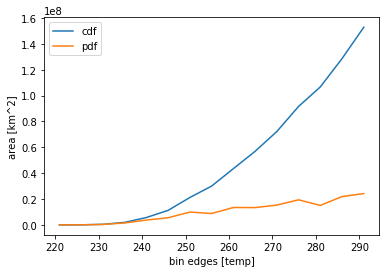

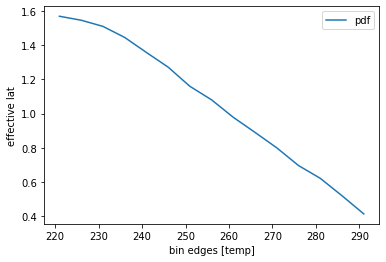

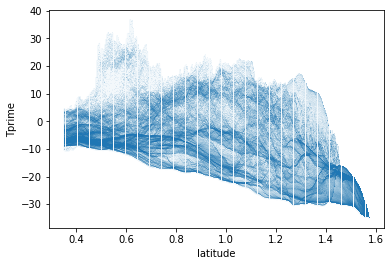

In [80]:
binedgs, pdf_area,cdf_area = dists_of_areas(data_array.t2m[times==times[0]],data_array.latitude[times==times[0]],plot=True)
pdf_lat_effs = dists_of_lat_eff(cdf_area,binedges=binedgs,plot=True)
Tprime= T_prime(data_array[times==times[0]],binedgs,pdf_lat_effs)
plt.plot(data_array.latitude[times==times[0]],Tprime,alpha=0.05,marker=',')
plt.xlabel('latitude')
plt.ylabel('Tprime')
plt.show()

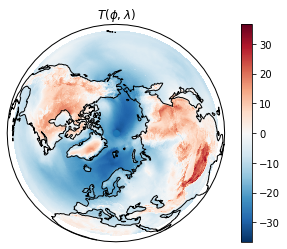

In [130]:
#plot T' on a globe
#first convert it to an xarray
latitude_coords = np.flip(np.arange(20.25,90.001,step=0.25))
longitude_coords = np.arange(0,360,step=0.25)
everest_lat = 27.9881
everest_lon = 86.9250

z = np.array(Tprime).reshape((280,1440))
x_Tp = xr.DataArray(z,
                   dims = ('lat','lon'),
                   coords={'lat':latitude_coords,'lon':longitude_coords})
#then set up the axes for a globe
ax = plt.axes(projection=ccrs.Orthographic(20, 90))
#coolcool now we can plot it
ax.plot(everest_lat,everest_lon,marker='o')
x_Tp.plot(ax=ax,
          transform=ccrs.PlateCarree())
#ax.set_title(r"$T'(\phi,\lambda) = T_{ref}(\phi) - T(\phi,\lambda)$")
ax.set_title(r"$T(\phi,\lambda)$")
ny_lon, ny_lat = -75, 43
#ax.plot(70, 20, marker='o')
ax.plot()
#make it draw the pretty continents
ax.set_global(); ax.coastlines();


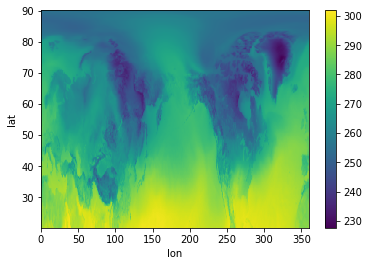

In [125]:
x_Tp.plot()

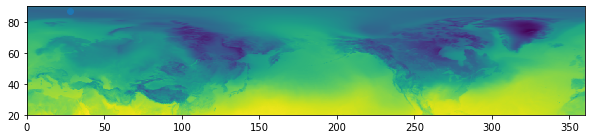

In [129]:
#Alternatively, plot it on a plane
fig, ax = plt.subplots(figsize = (10, 10))
#z = np.array(Tprime).reshape((280,1440))
#print(z[:,0])
plt.imshow(z, extent=(0, 360, 20, 90))#, aspect = 'auto')
plt.plot(everest_lat,everest_lon,marker='o')

#plt.colorbar()
plt.show()

## Tests and messing around

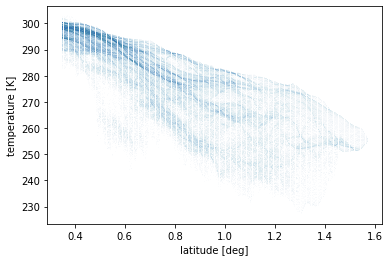

In [21]:
plt.plot(lats[times==times[0]]*180/np.pi,Temps[times==times[0]], marker=',',alpha=0.015)
plt.xlabel('latitude [deg]')
plt.ylabel('temperature [K]')
plt.show()

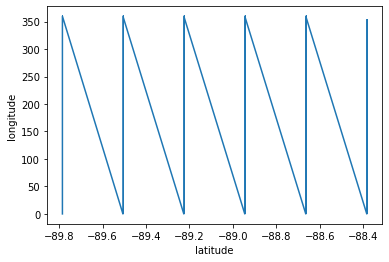

In [29]:
plt.plot(lat[:1000000],air_week_df['lon'][:1000000],marker=',')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

In [14]:
print(air.groupby(['time'], as_index=False)['t2m'].count())

         time     t2m
0  2007-12-02  542080
1  2007-12-09  542080
2  2007-12-16  542080
3  2007-12-23  542080
4  2007-12-30  542080
5  2008-01-06  542080
6  2008-01-13  542080
7  2008-01-20  542080
8  2008-01-27  542080
9  2008-02-03  542080
10 2008-02-10  542080
11 2008-02-17  542080
12 2008-02-24  542080
13 2008-03-02  542080


In [53]:
#angular resolution (lon) of reported temp data is coarser at poles (Every 20deg) than at mid-lat (~every 2 deg). 
#at equator, its every 0.33? deg
#this makes sense because it would be pretty expensive to have it every 0.25 deg at poles!
first_air_week_df.lon[np.logical_not(np.isnan(first_air_week_df.t2m))][129600:129670]
#print(np.sum(np.logical_not(np.isnan(first_air_week_df.t2m))),len(first_air_week_df.t2m))

2465393    160.96
2465404    161.28
2465413    161.60
2465423    161.92
2465432    162.24
            ...  
2466082    181.76
2466092    182.08
2466102    182.40
2466113    182.72
2466123    183.04
Name: lon, Length: 70, dtype: float64

In [ ]:
#-------test whether ivans thing counts the nans ---------# (never ran)
air_week_df = air_week_df.assign(temp_bracket =  pd.cut(air_week_df['t2m'], cut_off))
air_week_df_high = air_week_df[air_week_df.lat > 20]
air_week_df_group_north_pdf = ai
r_week_df_north.groupby(['temp_bracket', 'time'], as_index=False)['lat'].count()
# Calculate cumulative number of grids per temperature bins
air_week_df_group_north_cdf = air_week_df_group_north_pdf.assign(lat_cumsum = air_week_df_group_north_pdf.lat.cumsum())
air_week_df_group_north_cdf['left_temp_interval']  = air_week_df_group_north_cdf.temp_bracket.apply(lambda x: x.left)

In [16]:
len(air_week.isel(time=5)['lat'])

640

In [69]:
np.all(ds_grib['values']['lon']==ds_grib['longitude'])#['longitude'][(ds_grib['latitude']<0.4)&(ds_grib['latitude']> 0)]

<xarray.DataArray ()>
array(True)
Coordinates:
    number   int64 0
    step     timedelta64[ns] 00:00:00
    surface  int64 0

In [79]:
len(ds_grib['longitude'][ds_grib['latitude']>89.78])

18

In [81]:
ds_grib_cut = ds_grib[[ds_grib['latitude']>20]]

KeyboardInterrupt: 

In [ ]:
ds_grib_cut

In [86]:
np.isnan(ds_grib_reshaped)

<xarray.Dataset>
Dimensions:     (lat: 640, lon: 11942, time: 184)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2007-12-01 ... 2008-03-01T12:00:00
    step        timedelta64[ns] 00:00:00
    surface     int64 0
    latitude    (lon, lat) float64 -89.78 -89.51 -89.23 -88.95 ... nan nan nan
    longitude   (lon, lat) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    valid_time  (time) datetime64[ns] 2007-12-01 ... 2008-03-01T12:00:00
  * lon         (lon) float64 0.0 0.2812 0.2963 0.3 ... 359.7 359.7 359.7 359.7
  * lat         (lat) float64 -89.78 -89.51 -89.23 -88.95 ... 89.23 89.51 89.78
Data variables:
    t2m         (time, lon, lat) bool False False False False ... True True True

In [94]:
ds_grib_week = ds_grib.resample(time='1W').mean()
df_grib_week = ds_grib_week.to_dataframe().filter(['latitude', 'longitude', 't2m'])
a = df_grib_week.reset_index(drop=False)
a = a[a.time == '2007-12-02']
a_group = a.groupby(['latitude'], as_index=False).longitude.count()

KeyError: ('latitude', 'longitude', 't2m')

In [91]:
ds_grib

<xarray.Dataset>
Dimensions:     (time: 184, values: 542080)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2007-12-01 ... 2008-03-01T12:00:00
    step        timedelta64[ns] 00:00:00
    surface     int64 0
    latitude    (values) float64 89.78 89.78 89.78 ... -89.78 -89.78 -89.78
    longitude   (values) float64 0.0 20.0 40.0 60.0 ... 280.0 300.0 320.0 340.0
    valid_time  (time) datetime64[ns] 2007-12-01 ... 2008-03-01T12:00:00
  * values      (values) MultiIndex
  - lon         (values) float64 0.0 20.0 40.0 60.0 ... 280.0 300.0 320.0 340.0
  - lat         (values) float64 89.78 89.78 89.78 ... -89.78 -89.78 -89.78
Data variables:
    t2m         (time, values) float32 247.30748 247.49889 ... 224.41501
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-01-30T21:06:00 GRIB to CDM+CF via cfgrib-0....

In [57]:
data_array = pd.read_csv('/project2/geos39650/jet_stream/data/t2m_temp_1207_0208.csv')

In [51]:
#fig, ax = plt.subplots(figsize = (20, 20))
print(len(data_array.t2m)/14)
#temp_grid = np.array(data_array['t2m'])
#temp_grid_week1 = temp_grid[:int(len(data_array.t2m)/13)]
#plt.plot(data_array.latitude,data_array.longitude,marker=',')
print(1440*720)
#plt.show()
#temp_grid = temp_grid.resize((len(data_array.latitude),len(data_array.longitude)))
#data_array.plot()

403200.0
1036800


In [55]:
data_array = pd.read_csv('/project2/geos39650/jet_stream/data/t2m_temp_1207_0208.csv')
data_array.set_index(['latitude', 'longitude', 'time'], inplace=True)
data_array.count()

t2m             5644800
area_grid       5644800
temp_bracket    5644800
dtype: int64

TypeError: Invalid shape (5644800,) for image data

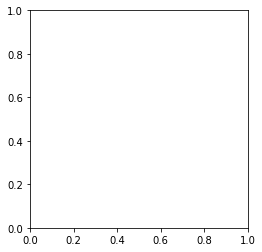

In [74]:
plt.imshow((np.array(data_array.t2m).reshape

In [87]:
np.array(data_array.t2m[:5643000]).reshape((2375,2376))

array([[255.99916, 257.67792, 254.5231 , ..., 243.21518, 246.89442,
        247.59566],
       [252.9362 , 248.91232, 247.85942, ..., 250.6471 , 249.62552,
        249.91008],
       [246.69974, 243.21518, 246.89442, ..., 247.29417, 255.99916,
        257.67792],
       ...,
       [297.2029 , 296.51587, 296.79306, ..., 291.19803, 291.05746,
        291.5383 ],
       [294.55444, 293.53278, 292.57053, ..., 295.43552, 295.62686,
        293.85608],
       [295.4376 , 295.53394, 295.70703, ..., 295.99722, 295.9684 ,
        295.73315]])

In [97]:
len(np.array(data_array.t2m))/1440/14

280.0

In [113]:
z = np.array(data_array.t2m).reshape((280,1440,14))
len(z[0])

1440

In [98]:
(90-20)*4

280

## Code for when data was in .grib files
and in a reduced gaussian grid

In [4]:
#load data
ds_grib = xr.load_dataset(
    '/project2/geos39650/jet_stream/reanalysis_getter/cdsapi_requested_files/cds_dec07-feb08_12hrs.grib', 
    engine='cfgrib')

#fix indexing because the way it is done by default is stupid
index = pd.MultiIndex.from_arrays(
    [ds_grib.longitude.values, 
     ds_grib.latitude.values], 
    names=['lon', 'lat']
)
ds_grib['values'] = index

ds_grib_reshaped = ds_grib.unstack('values')


In [8]:
#air = ds_grib_reshaped.t2m.T
air = ds_grib_reshaped.t2m.T

#average each week
air_week = air.resample(time='1W').mean()
air_week_df = air_week.to_dataframe()
air_week_df = air_week_df.reset_index(drop=False).filter(['lat', 'lon', 'time', 't2m'])

/home/afarah/.conda/envs/jetstream/lib/python3.6/site-packages/xarray/core/dataarray.py:1897: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  return self.transpose()


In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
air.isel(time=100).plot()

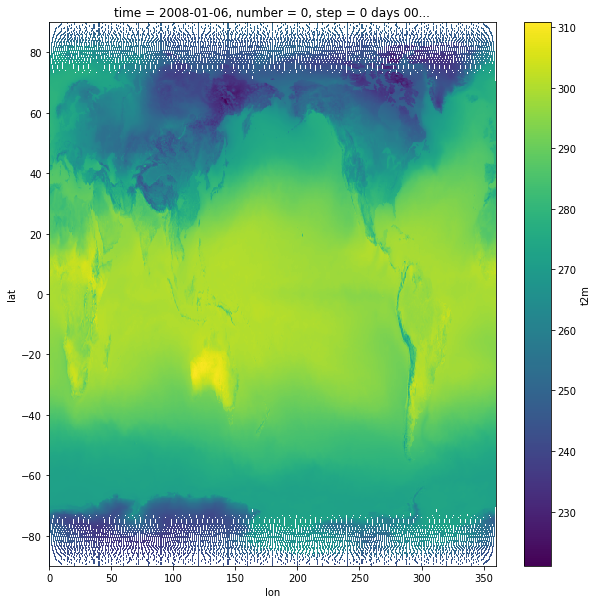

In [11]:
fig, ax = plt.subplots(figsize = (10, 10))
air_week.isel(time=5).plot() 

In [10]:
#--- MOAR FORMATTING! ----#
#lets just look at the first week
# first_air_week = air_week.isel(time=0)
# first_air_week_df = first_air_week.to_dataframe()
# first_air_week_df = first_air_week_df.reset_index(drop=False).filter(['lat', 'lon', 'time', 't2m'])

# Temp = first_air_week_df['t2m'][first_air_week_df['lat']>20] 
# Temp = np.linspace(Tmin,Tmax,num=100)
# Temp += np.random.normal(loc=50,scale=50, size=100)

#ok now look at all of the weeks
weeks = range(13)
all_weeks_df =air_week.isel(time=weeks).to_dataframe().reset_index(drop=False).filter(['lat', 'lon', 'time', 't2m'])
#put a cut to only look above ~mexico
lat_cut_bools = all_weeks_df['lat']>20 
# temp_all_weeks_df = all_weeks_df['t2m'][lat_cut_bools] 

#dataframes ill be using as inputs to functions
Temps = all_weeks_df['t2m'][lat_cut_bools] 
times = all_weeks_df['time']
lats  = all_weeks_df['lat'][lat_cut_bools]*np.pi/180.

#make temp bins
Tmin = min(Temps)
Tmax = max(Temps) #kelvin
Tbins = range(int(Tmin),int(Tmax),5)

In [50]:
#all analysis functions
def plots(binedges,pdf,cdf,xlab):
    plt.plot(cdf,binedges,label='cdf')
    plt.plot(pdf,binedges,label='pdf')
    plt.ylabel('bin edges [temp]')
    plt.xlabel(xlab)
    plt.legend()
    plt.show()
    
def dists_of_boxes(temp_df,plot=False):
    #number of boxes at each temp
    pdf_boxes, binedges = np.histogram(temp_df,bins=Tbins)
    #number of boxes below each temp
    cdf_boxes=np.cumsum(pdf_boxes)
    if plot:
        plots(binedges[:-1],pdf_boxes,cdf_boxes,'number of boxes')
    return binedges[:-1], pdf_boxes, cdf_boxes

#area 
def dists_of_areas(temp_df,lat,plot=False):
    #weight entry by box area so that y axis is no longer the number of boxes, but rather the area taken up by each box
    #this is the area of each grid cell
    #lat = air_df['lat'][air_df['lat']>20]*np.pi/180. #np.linspace(np.pi/2.,np.pi/2.*(1-1/4.),num=100)
    areas = (R_earth*dphi)**2 * np.cos(lat)
    pdf_areas, binedges = np.histogram(temp_df,bins=Tbins,weights=areas)
    cdf_areas=np.cumsum(pdf_areas)
    if plot:
        plots(binedges[:-1],pdf_areas,cdf_areas,'area [km^2]')

    return binedges[:-1], pdf_areas, cdf_areas

#convert area to effective latitude
def dists_of_lat_eff(cdf_areas,binedges=None,plot=False):
    """if plot is set to true, must specify binedges"""
    #A = 2piR^2 (1-sin(lat_eff))
    #so 1-A/(2piR^2) = sin(lat_eff)
    #but remember latitude is defined to start at pi at the north pole
    pdf_lat_effs = np.pi/2.-np.arccos(1-cdf_areas / (2*np.pi*R_earth**2) )
    cdf_lat_effs = np.cumsum(pdf_lat_effs)
    if plot:
        plots(binedges,pdf_lat_effs,pdf_lat_effs,'effective lat')
    return pdf_lat_effs

def T_prime(data_array,binedges,pdf_lat_effs):
    #take a lat,lon point
    true_lat = data_array.latitude
    true_long =data_array.longitude
    #calculate T_ref with just the latitude, given the effective lat vs temp contour relation
    T_ref = np.interp(true_lat,pdf_lat_effs,binedges)
    #calculate T'(lat,lon) which is T_true(lat,lon,time) - T_ref(lat,lon,time)
    Tprime = T_ref - data_array.t2m #this is a function of longitude and time
    return Tprime, data_array.longitude, data_array.time

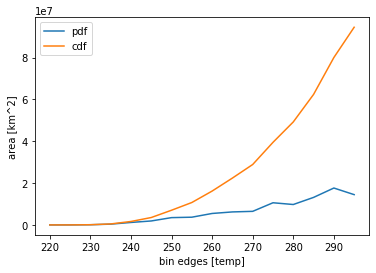

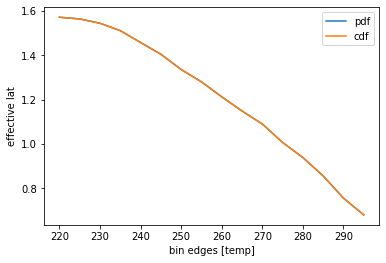

0           NaN
1      1.563757
2      1.516448
3      1.412669
4      1.255504
         ...   
247         NaN
248         NaN
249         NaN
250         NaN
251         NaN
Name: eff_latitude, Length: 252, dtype: float64


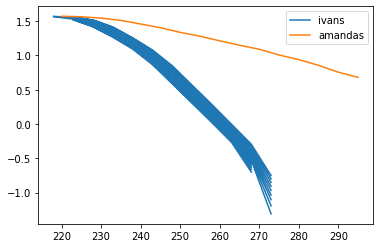

In [13]:
# #test it out with the first week
binedgs, pdf_area,cdf_area = dists_of_areas(Temps[times==times[0]],lats[times==times[0]],plot=True)
pdf_lat_effs = dists_of_lat_eff(cdf_area,binedges=binedgs,plot=True)

#compare with iván's analysis
ivans = pd.read_csv('/project2/geos39650/jet_stream/data/t2m_per_eff_latitude.csv')
print(ivans['eff_latitude'])
plt.plot(ivans['left_temp_interval'],ivans['eff_latitude'],label='ivans')
plt.plot(binedgs,pdf_lat_effs,label='amandas')
plt.legend()
plt.show()

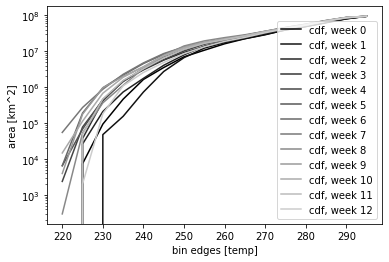

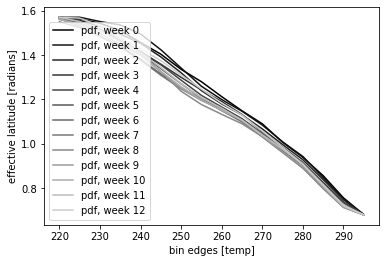

In [14]:
#now for realzies with all weeks
pdf_lat = np.zeros([len(weeks),len(Tbins)-1])
cdf_area = np.zeros([len(weeks),len(Tbins)-1])
colors = np.linspace(0,0.8,num=len(weeks),dtype=str)
for w in weeks:
    timestamp = times[w]
    this_week_temp = Temps[times==timestamp]
    x,pdf,cdf_area[w,:] = dists_of_areas(this_week_temp,lats[times==timestamp])
    pdf_lat[w,:],cdf = dists_of_lat_eff(cdf_area[w,:])
    plt.plot(x,cdf_area[w],label='cdf, week %i'%w,c=colors[w])
plt.legend()
plt.xlabel('bin edges [temp]')
plt.ylabel('area [km^2]')
plt.yscale('log')
plt.show()

for w in weeks:
    plt.plot(x,pdf_lat[w],label='pdf, week %i'%w,c=colors[w])
plt.legend()
plt.xlabel('bin edges [temp]')
plt.ylabel('effective latitude [radians]')
plt.show()

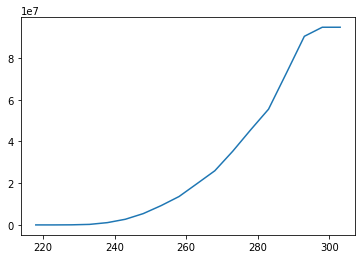

In [45]:
plt.plot(x,cdf_area[0])

plt.show()

In [44]:
# data_to_save = pd.DataFrame()
# left_temps = np.tile(x,(len(weeks),1))
#data_to_save['left_temp_interval']=left_temps
# data_to_save['cdf_area']=cdf_area
# data_to_save['pdf_lat']=pdf_lat
path_to_save = '/project2/geos39650/jet_stream/data/amanda/'
np.savetxt(path_to_save+'left_temp_interval.csv',x)
np.savetxt(path_to_save+'times.csv',times)
np.savetxt(path_to_save+'cdf_area.csv',cdf_area)
np.savetxt(path_to_save+'pdf_lat.csv',pdf_lat)